In [ ]:
'''

Akbarali Otakhanov
Professor: Hee-Cheol Kim
Inje University, 2021
Gimhea, South Korea

Outputs
A float32 tensor of shape [1, 6, 56].

The first dimension is the batch dimension, which is always equal to 1.
The second dimension corresponds to the maximum number of instance detections. 
The model can detect up to 6 people in the image frame simultaneously.
The third dimension represents the predicted bounding box/keypoint locations and scores. 
The first 17 * 3 elements are the keypoint locations and scores in the format: 
[y_0, x_0, s_0, y_1, x_1, s_1, …, y_16, x_16, s_16], where y_i, x_i, s_i are the yx-coordinates 
(normalized to image frame, e.g. range in [0.0, 1.0]) and confidence scores of the i-th joint correspondingly. 
The order of the 17 keypoint joints is: [nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle]. 
The remaining 5 elements [ymin, xmin, ymax, xmax, score] represent the region of the bounding box (in normalized coordinates) and the confidence score of the instance.

'''

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

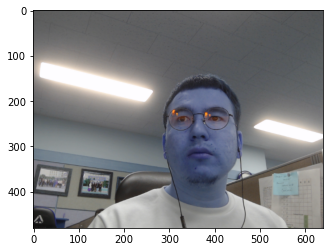

In [ ]:
plt.imshow(frame)

In [ ]:
frame

array([[[ 89,  89,  87],
        [ 87,  89,  87],
        [ 86,  89,  89],
        ...,
        [ 80,  83,  87],
        [ 81,  85,  87],
        [ 82,  86,  88]],

       [[ 89,  89,  89],
        [ 89,  88,  89],
        [ 89,  89,  89],
        ...,
        [ 84,  86,  88],
        [ 86,  86,  88],
        [ 86,  86,  88]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 86,  86,  86],
        ...,
        [ 84,  86,  88],
        [ 86,  86,  88],
        [ 85,  84,  87]],

       ...,

       [[ 23,  23,  25],
        [ 21,  20,  23],
        [ 21,  20,  23],
        ...,
        [121, 110, 108],
        [117, 109, 105],
        [118, 110, 106]],

       [[ 23,  23,  25],
        [ 23,  23,  24],
        [ 20,  20,  20],
        ...,
        [109, 103, 100],
        [103,  99,  97],
        [103,  99,  97]],

       [[ 19,  19,  19],
        [ 24,  24,  24],
        [ 21,  21,  21],
        ...,
        [101,  97,  94],
        [ 99,  97,  95],
        [ 97,  96,  94]]

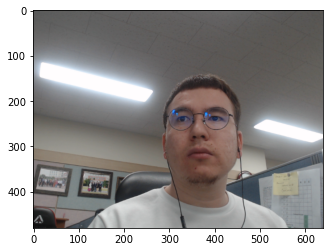

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    #Detection
    results = movenet(input_img)
    #print(results)
    #keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.31874061e-01,  7.70790100e-01,  5.38729250e-01,
          4.99242276e-01,  8.02796006e-01,  6.71949029e-01,
          4.90417212e-01,  6.86292529e-01,  6.96970403e-01,
          5.53320944e-01,  8.31249356e-01,  6.01812899e-01,
          5.73585689e-01,  5.81732869e-01,  6.15718246e-01,
          8.39567006e-01,  9.38012779e-01,  6.11451924e-01,
          8.29538524e-01,  4.11459178e-01,  7.27719724e-01,
          8.79365921e-01,  9.67109442e-01,  1.01975282e-03,
          8.64992261e-01,  3.52740228e-01,  1.28926011e-04,
          8.38922560e-01,  8.60407531e-01,  1.78096239e-02,
          8.58064294e-01,  5.00347793e-01,  1.05708325e-02,
          8.89239132e-01,  8.45972717e-01,  1.03734010e-06,
          8.80503237e-01,  5.53788066e-01,  1.75314643e-08,
          7.76722372e-01,  9.56662953e-01,  2.47766394e-02,
          8.15420330e-01,  5.34770370e-01,  8.11000727e-03,
          4.50947493e-01,  7.861620

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.29557705e-01,  7.69703567e-01,  5.29461563e-01,
          4.98117000e-01,  8.04106891e-01,  6.66949093e-01,
          4.89428341e-01,  6.88497365e-01,  6.67140722e-01,
          5.51734686e-01,  8.36115956e-01,  6.78456783e-01,
          5.72107494e-01,  5.83388269e-01,  6.87250793e-01,
          8.40479255e-01,  9.34333980e-01,  6.17040098e-01,
          8.28003824e-01,  4.10549581e-01,  7.13968694e-01,
          8.75681460e-01,  9.67755437e-01,  1.20600103e-03,
          8.65208149e-01,  3.52982640e-01,  1.73797293e-04,
          8.38552177e-01,  8.61805141e-01,  1.89693552e-02,
          8.57552290e-01,  5.00908792e-01,  1.37275150e-02,
          8.94528031e-01,  8.39966416e-01,  9.72963676e-07,
          8.85700226e-01,  5.71216404e-01,  4.42251924e-08,
          8.08954000e-01,  9.61766183e-01,  3.40955481e-02,
          8.16767335e-01,  5.53122640e-01,  9.41369310e-03,
          4.66893047e-01,  8.024705

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.26070178e-01, 7.67165601e-01, 5.54320574e-01, 4.99820650e-01,
         8.02651763e-01, 6.08378232e-01, 4.86703336e-01, 6.88256621e-01,
         6.72777891e-01, 5.61792254e-01, 8.33958328e-01, 6.46251142e-01,
         5.71762502e-01, 5.82402587e-01, 6.35986209e-01, 8.40629101e-01,
         9.35083210e-01, 6.26799524e-01, 8.27163458e-01, 4.10574347e-01,
         7.28746533e-01, 8.73719215e-01, 9.49167609e-01, 1.29100936e-03,
         8.66744459e-01, 3.51603270e-01, 3.42575746e-04, 8.40730846e-01,
         8.60060334e-01, 1.59737822e-02, 8.60237539e-01, 4.79860336e-01,
         1.00446492e-02, 8.88471782e-01, 8.43716025e-01, 1.87985972e-06,
         8.80536735e-01, 5.36800325e-01, 5.84357878e-08, 7.41958261e-01,
         9.57446933e-01, 2.55663507e-02, 8.05250823e-01, 5.36484599e-01,
         9.04165022e-03, 4.48293537e-01, 7.87444532e-01, 1.18907960e-03,
         4.99019533e-01, 8.03634703e-01, 3.04811588e-03, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.27576327e-01, 7.22072184e-01, 5.86708188e-01, 4.91891474e-01,
         7.67777741e-01, 6.25166118e-01, 4.90430474e-01, 6.50891602e-01,
         7.55884469e-01, 5.60482860e-01, 8.17940176e-01, 6.53782427e-01,
         5.82777917e-01, 5.66465139e-01, 6.76786900e-01, 8.41927767e-01,
         9.43323493e-01, 6.36348128e-01, 8.27717483e-01, 4.06514674e-01,
         6.50477290e-01, 8.80129874e-01, 9.63380992e-01, 4.00400534e-03,
         8.60781252e-01, 3.61551315e-01, 2.78300769e-03, 8.40573549e-01,
         8.52878630e-01, 2.16471590e-02, 8.61954510e-01, 4.16966379e-01,
         1.38794417e-02, 8.95481348e-01, 8.78288746e-01, 5.88798248e-05,
         8.83692086e-01, 5.72875977e-01, 1.26090963e-05, 7.42576599e-01,
         9.57067370e-01, 1.83855277e-02, 8.05087328e-01, 5.32338500e-01,
         8.77128821e-03, 4.14906621e-01, 7.79646099e-01, 2.42304010e-03,
         4.63355243e-01, 7.95503557e-01, 1.04246242e-03, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.2143359e-01, 6.7551035e-01, 6.7750216e-01, 4.8636153e-01,
         7.3288667e-01, 5.8777857e-01, 4.9013636e-01, 6.1935645e-01,
         7.7438325e-01, 5.6241035e-01, 8.0887216e-01, 5.9680647e-01,
         5.8078861e-01, 5.5979604e-01, 6.7715168e-01, 8.4773320e-01,
         9.4627488e-01, 5.2286291e-01, 8.2147217e-01, 4.0861031e-01,
         7.2242093e-01, 8.8018215e-01, 9.6081996e-01, 3.2137458e-03,
         8.6031485e-01, 3.5992661e-01, 6.6402555e-03, 8.4117013e-01,
         8.7046188e-01, 1.8161396e-02, 8.6344981e-01, 4.1474327e-01,
         1.6860265e-02, 8.9679313e-01, 8.7865353e-01, 1.5440743e-04,
         8.8292301e-01, 5.8451593e-01, 9.8273995e-05, 8.1604916e-01,
         9.2375642e-01, 1.9398088e-02, 8.0415636e-01, 3.9318261e-01,
         1.4008781e-02, 3.9196160e-01, 7.2881949e-01, 1.8926092e-03,
         3.8766196e-01, 6.8244439e-01, 5.3462299e-04, 3.4765705e-01,
         3.0372319e-01, 8.7519121e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.25483191e-01, 6.34360850e-01, 6.35625660e-01, 4.79400605e-01,
         6.88013852e-01, 5.90674698e-01, 4.95583445e-01, 5.78365862e-01,
         5.92386842e-01, 5.48895299e-01, 7.86731720e-01, 7.05326140e-01,
         5.78255653e-01, 5.35689354e-01, 7.12110937e-01, 8.44372690e-01,
         9.43813205e-01, 5.05998850e-01, 8.34266126e-01, 3.95853162e-01,
         6.58288956e-01, 8.77315938e-01, 9.57291067e-01, 6.13368175e-04,
         8.62152100e-01, 3.49729151e-01, 2.46910518e-03, 8.37914169e-01,
         8.61002564e-01, 1.48127433e-02, 8.59879613e-01, 3.94658864e-01,
         2.45738011e-02, 8.84667873e-01, 8.80964994e-01, 4.49870131e-05,
         8.81349623e-01, 5.80059171e-01, 1.20479972e-05, 8.46161187e-01,
         9.14550662e-01, 2.89859287e-02, 8.14631701e-01, 3.76061291e-01,
         3.40558030e-02, 3.92400026e-01, 6.98670805e-01, 1.51814171e-03,
         3.86492193e-01, 6.52132392e-01, 2.83144211e-04, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.25100052e-01, 5.75820267e-01, 5.40145516e-01, 4.81815547e-01,
         6.35196269e-01, 6.50875926e-01, 5.02287626e-01, 5.26302218e-01,
         6.55958533e-01, 5.61997831e-01, 7.41330564e-01, 7.16078937e-01,
         5.82575560e-01, 4.88655895e-01, 5.52199364e-01, 8.37050200e-01,
         9.29040611e-01, 6.23152375e-01, 8.57412517e-01, 3.52611721e-01,
         5.85617065e-01, 8.74176681e-01, 9.36301053e-01, 1.13281436e-04,
         8.71457338e-01, 3.30930114e-01, 7.54140667e-04, 8.34576964e-01,
         8.29729736e-01, 2.39830501e-02, 8.64434004e-01, 3.74693245e-01,
         7.28358030e-02, 8.77979517e-01, 8.63898039e-01, 1.18538286e-04,
         8.76169682e-01, 5.67343473e-01, 2.92473633e-05, 8.39147627e-01,
         8.79775405e-01, 1.48239713e-02, 8.44567418e-01, 3.35844010e-01,
         5.43058254e-02, 3.88102472e-01, 6.48235261e-01, 1.25458103e-03,
         3.92289996e-01, 6.20844007e-01, 4.00778721e-04, 3.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.49021363e-01,  4.93235439e-01,  5.39865017e-01,
          5.10003924e-01,  5.46842754e-01,  5.73499858e-01,
          5.29728830e-01,  4.44999665e-01,  4.61407721e-01,
          5.76420128e-01,  6.47439718e-01,  6.75251722e-01,
          6.14423633e-01,  4.18550193e-01,  3.73649210e-01,
          8.47839773e-01,  8.44607174e-01,  6.47609174e-01,
          8.90630007e-01,  3.15642238e-01,  3.01270545e-01,
          8.71936500e-01,  8.77727628e-01,  9.88773187e-04,
          8.76082897e-01,  3.04093033e-01,  9.50454362e-03,
          8.38752985e-01,  7.54588783e-01,  3.51208113e-02,
          8.21689487e-01,  3.86856794e-01,  9.76936296e-02,
          8.92938673e-01,  7.64074266e-01,  1.07199536e-04,
          8.76329720e-01,  4.91061270e-01,  8.45303657e-05,
          8.39558840e-01,  7.96603978e-01,  6.33288734e-03,
          8.52830172e-01,  3.01879674e-01,  2.03905161e-02,
          4.40698087e-01,  6.144708

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[5.91572762e-01, 4.29088950e-01, 5.64388990e-01, 5.53717494e-01,
         4.83534098e-01, 7.50659347e-01, 5.82858026e-01, 3.81816864e-01,
         6.93051577e-01, 6.14914596e-01, 5.76903701e-01, 5.93848050e-01,
         6.65171027e-01, 3.63832414e-01, 3.82110059e-01, 8.41224432e-01,
         7.66778588e-01, 4.12405819e-01, 8.79020095e-01, 3.01771730e-01,
         2.35367134e-01, 8.71750832e-01, 8.06305528e-01, 6.03216817e-04,
         8.72917056e-01, 2.86413848e-01, 1.43003112e-04, 8.38017046e-01,
         6.74405038e-01, 6.07194304e-02, 8.45807374e-01, 4.13849026e-01,
         1.47489652e-01, 8.80086899e-01, 7.32321620e-01, 9.29946837e-05,
         8.76692951e-01, 5.00114024e-01, 4.39453434e-05, 8.53912175e-01,
         6.43431783e-01, 3.04850261e-03, 8.30851495e-01, 3.71266007e-01,
         2.97391433e-02, 4.93060917e-01, 6.05716765e-01, 2.24631542e-04,
         5.27065039e-01, 6.53474748e-01, 2.66926247e-04, 4.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 6.02895021e-01,  4.20172900e-01,  4.42160487e-01,
          5.66917598e-01,  4.76080298e-01,  6.56094968e-01,
          5.96845746e-01,  3.74517173e-01,  4.97592688e-01,
          6.33875072e-01,  5.67157447e-01,  6.38243616e-01,
          6.87223494e-01,  3.54729652e-01,  2.69480228e-01,
          8.45451117e-01,  7.74912119e-01,  3.51205736e-01,
          8.83849084e-01,  2.74849474e-01,  1.98805049e-01,
          8.62919509e-01,  7.88732648e-01,  6.33572519e-04,
          8.71698260e-01,  2.88879782e-01,  1.02058705e-02,
          8.36097717e-01,  6.70750439e-01,  6.20941967e-02,
          8.52969885e-01,  3.53559583e-01,  2.24304393e-01,
          8.77395213e-01,  7.19117403e-01,  1.70293541e-04,
          8.77602458e-01,  4.93484527e-01,  1.20184894e-04,
          8.41951430e-01,  6.70356095e-01,  4.49948572e-03,
          8.29105616e-01,  3.64964515e-01,  5.63784428e-02,
          5.08100569e-01,  5.697057

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.83176196e-01,  4.74671483e-01,  6.26943469e-01,
          5.38378954e-01,  5.24964988e-01,  7.39042878e-01,
          5.59378207e-01,  4.26413894e-01,  6.22182667e-01,
          5.98247588e-01,  6.12216175e-01,  7.10224450e-01,
          6.33666039e-01,  3.98309976e-01,  4.79470134e-01,
          8.52575243e-01,  8.15963387e-01,  5.81068814e-01,
          8.75631750e-01,  3.10360909e-01,  3.20075482e-01,
          8.65605354e-01,  8.41407359e-01,  8.09622812e-04,
          8.73545170e-01,  2.99558938e-01,  2.21020819e-04,
          8.37247908e-01,  7.22501874e-01,  3.69601510e-02,
          8.54181528e-01,  4.48282897e-01,  4.83160838e-02,
          8.87132347e-01,  7.77846098e-01,  5.00193237e-05,
          8.79175544e-01,  5.31778455e-01,  2.70472337e-05,
          8.49653780e-01,  6.92164600e-01,  3.16669163e-03,
          8.28647196e-01,  3.72283250e-01,  5.92159154e-03,
          4.57280844e-01,  6.542471

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.72509921e-01, 5.86352527e-01, 6.87374949e-01, 4.29661900e-01,
         6.45266652e-01, 7.52972782e-01, 4.40852255e-01, 5.29012978e-01,
         6.48508966e-01, 5.02134144e-01, 7.34295487e-01, 5.89407027e-01,
         5.32100976e-01, 4.84359771e-01, 5.10425806e-01, 8.05977225e-01,
         9.38145459e-01, 4.96107846e-01, 8.22485447e-01, 3.35578322e-01,
         6.72867060e-01, 8.61831546e-01, 9.63244438e-01, 1.31652527e-03,
         8.62683177e-01, 2.97838360e-01, 3.72444233e-03, 8.38524640e-01,
         8.34625244e-01, 3.78770307e-02, 8.41384888e-01, 4.02019739e-01,
         4.44951095e-02, 8.69888783e-01, 8.34711909e-01, 4.10888111e-04,
         8.79778564e-01, 5.21857798e-01, 8.28012708e-05, 8.00651491e-01,
         9.03653979e-01, 4.50649448e-02, 8.07438672e-01, 3.09864074e-01,
         9.19538960e-02, 3.43731225e-01, 6.62982881e-01, 2.30993086e-04,
         4.20697272e-01, 6.88126445e-01, 5.95594756e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.32024002e-01,  6.61732197e-01,  5.32710731e-01,
          3.89146030e-01,  7.23937452e-01,  6.14432037e-01,
          3.97483230e-01,  5.99140048e-01,  6.84888780e-01,
          4.80705678e-01,  8.19509089e-01,  6.27771139e-01,
          5.01448512e-01,  5.48200130e-01,  4.88726705e-01,
          7.89166570e-01,  9.77187634e-01,  7.11391687e-01,
          7.97056079e-01,  3.70306730e-01,  4.37739998e-01,
          8.77686143e-01,  9.74801481e-01,  9.53564362e-04,
          8.61009240e-01,  3.08483392e-01,  9.98613331e-03,
          8.56884897e-01,  8.81614089e-01,  1.66648179e-02,
          8.39459121e-01,  4.07499433e-01,  3.82504240e-02,
          8.80173683e-01,  8.66106212e-01,  1.23253631e-04,
          8.82920563e-01,  5.63608527e-01,  3.16708756e-05,
          7.72906721e-01,  9.35372472e-01,  2.97353063e-02,
          7.74520040e-01,  3.38805169e-01,  9.84735116e-02,
          3.31913024e-01,  6.075970

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.29359466e-01,  6.37394071e-01,  6.35966659e-01,
          3.89782101e-01,  6.99800611e-01,  5.99045813e-01,
          3.97536129e-01,  5.85958898e-01,  6.87233388e-01,
          4.75477040e-01,  8.02597404e-01,  6.63014948e-01,
          4.88240957e-01,  5.44236481e-01,  6.06252313e-01,
          7.57877052e-01,  9.68116820e-01,  6.87010169e-01,
          7.77329445e-01,  3.79106760e-01,  7.46951044e-01,
          8.78302872e-01,  9.53011632e-01,  2.56294035e-03,
          8.62566113e-01,  3.17322165e-01,  3.03004067e-02,
          8.54080737e-01,  8.28452647e-01,  1.74193550e-02,
          8.30581188e-01,  4.22593206e-01,  4.55868840e-02,
          8.83585155e-01,  8.34792197e-01,  8.70359654e-04,
          8.79183829e-01,  5.52707136e-01,  7.55295856e-04,
          7.74118781e-01,  9.19827640e-01,  8.84580985e-03,
          7.66358733e-01,  3.46999347e-01,  1.29095793e-01,
          3.47566158e-01,  6.196846

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.29979920e-01,  6.33076072e-01,  7.02549756e-01,
          3.90848160e-01,  6.95698917e-01,  7.67955601e-01,
          4.01957422e-01,  5.83239973e-01,  6.92200243e-01,
          4.73995417e-01,  8.03910732e-01,  6.33457661e-01,
          4.88069922e-01,  5.41305482e-01,  5.54435730e-01,
          7.30082870e-01,  9.74358857e-01,  6.32143319e-01,
          7.46256471e-01,  3.90693098e-01,  7.06789672e-01,
          8.79588068e-01,  9.68096614e-01,  4.81404271e-03,
          8.65989149e-01,  3.23818117e-01,  2.28576455e-02,
          8.55651081e-01,  8.27915430e-01,  2.22890712e-02,
          8.43544900e-01,  4.22997892e-01,  3.12919244e-02,
          8.80878329e-01,  8.38336527e-01,  1.97612378e-03,
          8.76922667e-01,  5.72581232e-01,  2.14857096e-03,
          7.72117198e-01,  9.17246044e-01,  9.33030806e-03,
          7.55113602e-01,  3.62129956e-01,  5.78048341e-02,
          4.10788774e-01,  5.640502

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.00246382e-01, 6.46306038e-01, 6.76291823e-01, 3.55760485e-01,
         7.14633405e-01, 7.32037008e-01, 3.68436337e-01, 5.94455957e-01,
         7.72367001e-01, 4.45287824e-01, 8.28099251e-01, 6.64230525e-01,
         4.59464014e-01, 5.43894947e-01, 5.80972433e-01, 7.11278915e-01,
         9.70451057e-01, 7.31863081e-01, 7.35474527e-01, 3.72860879e-01,
         6.10152721e-01, 8.75705659e-01, 9.73988950e-01, 4.57998645e-03,
         8.66562307e-01, 3.09529603e-01, 6.03568666e-02, 8.62323403e-01,
         8.26868534e-01, 1.23681137e-02, 8.42824399e-01, 4.19643283e-01,
         2.73205247e-02, 8.80206704e-01, 8.48330259e-01, 1.12198468e-03,
         8.73241723e-01, 5.94714582e-01, 1.49792165e-03, 7.40569711e-01,
         9.27312613e-01, 1.03141647e-02, 7.46172965e-01, 3.51146907e-01,
         4.54382561e-02, 4.10030067e-01, 5.25950789e-01, 1.01661375e-04,
         3.81754309e-01, 6.32255852e-01, 6.49113383e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[3.06432575e-01, 7.25141346e-01, 5.75699508e-01, 2.46988147e-01,
         8.02804053e-01, 6.27601504e-01, 2.65276819e-01, 6.50685430e-01,
         6.16639912e-01, 3.71952742e-01, 9.35309827e-01, 5.30954301e-01,
         3.86774331e-01, 5.78744173e-01, 4.01486456e-01, 6.48832679e-01,
         9.97886419e-01, 5.25608025e-02, 6.71780884e-01, 3.80167305e-01,
         4.38579053e-01, 8.81078005e-01, 1.00191271e+00, 1.72411877e-04,
         8.61573517e-01, 2.69022673e-01, 6.51316419e-02, 7.34706938e-01,
         9.38464522e-01, 5.04356436e-03, 8.24774146e-01, 4.57753211e-01,
         2.14266498e-02, 8.85720551e-01, 8.81910026e-01, 4.50661391e-05,
         8.73719275e-01, 6.37086511e-01, 9.00685336e-06, 7.12829292e-01,
         9.20824766e-01, 2.23121815e-03, 6.67711079e-01, 3.52804542e-01,
         1.31414920e-01, 3.32106233e-01, 4.43623662e-01, 1.81670208e-03,
         4.13715780e-01, 6.49908721e-01, 3.69771919e-03, 1.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[2.9181111e-01, 8.3633834e-01, 3.7389819e-02, 1.5877241e-01,
         8.6704993e-01, 3.6610889e-01, 1.6692150e-01, 7.3898840e-01,
         7.3678188e-02, 2.7351367e-01, 9.7349799e-01, 7.1574360e-02,
         2.5863859e-01, 6.4855105e-01, 2.3593098e-01, 5.5875570e-01,
         9.9930501e-01, 2.6693502e-02, 5.4240137e-01, 3.6760443e-01,
         3.2737815e-01, 8.6927605e-01, 9.8819494e-01, 1.1073957e-02,
         8.5118663e-01, 2.5991538e-01, 1.8058367e-02, 8.0391943e-01,
         9.0762269e-01, 7.5436118e-03, 8.4393102e-01, 4.4295639e-01,
         5.4310799e-02, 8.8622129e-01, 7.9878718e-01, 1.2839635e-06,
         8.8302040e-01, 4.5425951e-01, 1.4146967e-06, 7.7753580e-01,
         6.8564463e-01, 8.4114634e-03, 7.9162771e-01, 2.4712439e-01,
         1.2033899e-02, 5.6234032e-01, 3.5968390e-01, 1.8277375e-02,
         5.6249678e-01, 4.3480843e-01, 1.0268997e-02, 1.2129736e-01,
         1.4804515e-01, 8.6801791e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[2.41357982e-01, 8.33307326e-01, 1.76379710e-01, 1.84344575e-01,
         8.71384859e-01, 1.81720495e-01, 1.61753684e-01, 7.83653200e-01,
         1.80800185e-01, 2.45229602e-01, 9.76197839e-01, 1.37593791e-01,
         2.44576871e-01, 6.49005234e-01, 3.08353782e-01, 5.42879164e-01,
         9.95825410e-01, 4.89518940e-02, 5.50978065e-01, 3.89843524e-01,
         2.13124320e-01, 8.80403936e-01, 9.90018308e-01, 8.59135296e-03,
         8.52755904e-01, 3.04952204e-01, 7.25372434e-02, 6.39205098e-01,
         8.84922147e-01, 1.79954246e-02, 8.18355918e-01, 5.50650835e-01,
         5.81271574e-02, 8.80594909e-01, 8.19033265e-01, 1.09647859e-04,
         8.78993750e-01, 4.99671936e-01, 3.57997815e-05, 7.39885092e-01,
         7.16658115e-01, 1.18946936e-02, 7.29018807e-01, 3.30551207e-01,
         6.11492200e-03, 4.52752888e-01, 5.08696735e-01, 7.05972360e-03,
         5.40839016e-01, 4.79106784e-01, 9.65316314e-03, 1.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 3.17474395e-01,  6.94084704e-01,  4.87436891e-01,
          2.76343226e-01,  7.71212161e-01,  6.61494434e-01,
          2.93066442e-01,  6.32044375e-01,  5.51339328e-01,
          3.90415281e-01,  8.85227561e-01,  6.64997339e-01,
          4.16250110e-01,  5.79862177e-01,  4.40145910e-01,
          6.75684810e-01,  9.84689295e-01,  1.36442214e-01,
          6.92048490e-01,  4.10868943e-01,  6.94492638e-01,
          8.77327502e-01,  9.89356518e-01,  2.28457735e-04,
          8.70677829e-01,  3.35937917e-01,  2.98297610e-02,
          8.78642082e-01,  9.17430520e-01,  1.05376272e-02,
          8.53674889e-01,  4.66410100e-01,  4.17059548e-02,
          8.85558546e-01,  8.97891164e-01,  3.65340420e-05,
          8.67665052e-01,  6.15974069e-01,  4.93244734e-05,
          7.17228889e-01,  9.31151867e-01,  2.96850037e-03,
          6.82602763e-01,  3.74817759e-01,  5.04045226e-02,
          3.02796274e-01,  5.110796

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.25898790e-01,  6.39424384e-01,  6.47444248e-01,
          3.86836678e-01,  6.96839035e-01,  7.85902917e-01,
          4.02016908e-01,  5.89107275e-01,  6.17666006e-01,
          4.60642219e-01,  7.95235157e-01,  6.44151747e-01,
          4.85712618e-01,  5.52920043e-01,  6.30900025e-01,
          7.34664679e-01,  9.67100441e-01,  6.95944369e-01,
          7.57101774e-01,  4.04857188e-01,  6.25513732e-01,
          8.80820394e-01,  9.62831497e-01,  4.34306357e-03,
          8.64474654e-01,  3.43494534e-01,  4.70553339e-02,
          8.43766630e-01,  8.23975205e-01,  2.57653184e-02,
          8.26087654e-01,  4.42517936e-01,  2.13290025e-02,
          8.79683018e-01,  8.53805304e-01,  6.20024570e-04,
          8.77855659e-01,  5.99253953e-01,  5.83496992e-04,
          7.83039153e-01,  9.14912879e-01,  1.46461818e-02,
          7.99727976e-01,  3.63418907e-01,  3.75773050e-02,
          4.12623346e-01,  5.329778

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.8608953e-01, 6.2500882e-01, 6.1347258e-01, 4.4763520e-01,
         6.7966425e-01, 7.9979956e-01, 4.5789060e-01, 5.7463080e-01,
         6.4011508e-01, 5.1390505e-01, 7.6319641e-01, 5.8243889e-01,
         5.2186817e-01, 5.3987247e-01, 7.0819992e-01, 7.9270256e-01,
         9.1990554e-01, 5.6249160e-01, 7.9246718e-01, 4.1149440e-01,
         7.3117959e-01, 8.6505562e-01, 9.6835315e-01, 2.0559026e-02,
         8.6520553e-01, 3.5186827e-01, 4.6328422e-02, 8.1843352e-01,
         8.2899123e-01, 4.5947921e-02, 8.4103453e-01, 5.1994276e-01,
         1.5167587e-02, 8.8417500e-01, 8.0688179e-01, 3.5905020e-04,
         8.7997144e-01, 5.1946402e-01, 3.0092272e-04, 8.0942738e-01,
         9.0079296e-01, 1.9485470e-02, 8.1558144e-01, 3.6519641e-01,
         4.5069195e-02, 5.0143832e-01, 7.4969596e-01, 3.1645779e-04,
         4.7605687e-01, 7.2525841e-01, 4.2030177e-04, 3.2044554e-01,
         3.0382827e-01, 8.7276947e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.8476562e-01, 6.3511831e-01, 6.8247110e-01, 4.4507584e-01,
         6.9162017e-01, 6.9679755e-01, 4.5447055e-01, 5.8767843e-01,
         6.8759263e-01, 5.0851899e-01, 7.7681899e-01, 6.6400021e-01,
         5.2115953e-01, 5.4847401e-01, 6.5918189e-01, 7.8793055e-01,
         9.6270180e-01, 5.4200041e-01, 7.9073775e-01, 4.2540535e-01,
         7.5069398e-01, 8.7045097e-01, 9.7095555e-01, 2.0821332e-03,
         8.6675233e-01, 3.5598773e-01, 1.8248688e-02, 8.4367085e-01,
         8.5981482e-01, 3.3857707e-02, 8.4940487e-01, 4.5590553e-01,
         2.0091435e-02, 8.8112050e-01, 8.4482014e-01, 5.4078384e-05,
         8.7751502e-01, 5.6675583e-01, 2.9467235e-05, 8.2563633e-01,
         9.1440135e-01, 1.4335018e-02, 8.4967953e-01, 3.5428581e-01,
         3.7344739e-02, 6.0702664e-01, 6.5861183e-01, 2.6842097e-05,
         6.1030465e-01, 6.8303555e-01, 6.0050428e-04, 3.1763968e-01,
         3.2380491e-01, 8.7284553e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.2900729e-01,  6.6525835e-01,  6.7264169e-01,  3.9319256e-01,
          7.2455025e-01,  7.3271835e-01,  4.1070044e-01,  6.1285830e-01,
          7.7244067e-01,  4.8043361e-01,  8.2151610e-01,  6.2392372e-01,
          5.0404465e-01,  5.7149118e-01,  5.8710527e-01,  7.4058652e-01,
          9.8085940e-01,  7.7003598e-01,  7.6736325e-01,  4.3062073e-01,
          6.7813385e-01,  8.6129510e-01,  9.6813202e-01,  5.8853528e-03,
          8.6967856e-01,  3.5634312e-01,  5.9054211e-02,  8.5055614e-01,
          8.6338854e-01,  1.6078101e-02,  8.5081613e-01,  4.7335458e-01,
          1.2917916e-02,  8.8151938e-01,  8.9709204e-01,  1.9273992e-03,
          8.8698131e-01,  6.3034344e-01,  8.8027009e-04,  7.6640379e-01,
          9.4301808e-01,  1.8201323e-02,  7.7070946e-01,  4.0931267e-01,
          3.6505401e-02,  4.1616872e-01,  5.6854272e-01,  2.9404700e-05,
          4.4258714e-01,  7.8944510e-01,  5.7583716e-04,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.09303188e-01,  6.86598718e-01,  5.74242234e-01,
          3.68861586e-01,  7.47937083e-01,  7.98492134e-01,
          3.85914057e-01,  6.27005041e-01,  6.58572078e-01,
          4.56481159e-01,  8.56026232e-01,  6.86832190e-01,
          4.89228457e-01,  5.90727866e-01,  4.98402596e-01,
          7.36449778e-01,  9.83712792e-01,  5.93164086e-01,
          7.66707420e-01,  4.35606837e-01,  5.81446111e-01,
          8.58094990e-01,  9.72182393e-01,  1.57451897e-03,
          8.68697166e-01,  3.61404419e-01,  2.35910397e-02,
          8.27026069e-01,  8.80207717e-01,  1.17322300e-02,
          8.52014899e-01,  4.85839397e-01,  9.76104382e-03,
          8.81677032e-01,  9.06354070e-01,  1.34750779e-04,
          8.85152221e-01,  6.47588551e-01,  7.55581350e-05,
          7.65082181e-01,  9.48876739e-01,  1.16473567e-02,
          7.70199180e-01,  4.10794646e-01,  3.47960442e-02,
          4.22468305e-01,  5.567947

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 3.99114013e-01,  6.95937276e-01,  5.93998969e-01,
          3.54496956e-01,  7.60862887e-01,  7.53769517e-01,
          3.70034546e-01,  6.39452040e-01,  6.29499853e-01,
          4.47349548e-01,  8.72345805e-01,  6.66543067e-01,
          4.80411857e-01,  5.98144472e-01,  4.68038976e-01,
          7.21375167e-01,  9.88401115e-01,  3.73588979e-01,
          7.65475094e-01,  4.35677707e-01,  5.21937907e-01,
          8.56615365e-01,  9.75852370e-01,  1.49531849e-03,
          8.67764235e-01,  3.61533254e-01,  2.38920283e-02,
          7.59030282e-01,  8.75364840e-01,  1.10002682e-02,
          8.44049454e-01,  4.82889950e-01,  9.68016405e-03,
          8.79890561e-01,  9.08497572e-01,  2.01489951e-04,
          8.84295166e-01,  6.49725318e-01,  8.89619114e-05,
          7.33782768e-01,  9.22254622e-01,  8.43072776e-03,
          7.65410781e-01,  4.09506530e-01,  3.39540206e-02,
          4.04464185e-01,  5.775905

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 3.97648394e-01,  6.95398271e-01,  6.17054522e-01,
          3.50122541e-01,  7.62383461e-01,  6.96331739e-01,
          3.65532815e-01,  6.37724161e-01,  6.57553136e-01,
          4.42796826e-01,  8.78601015e-01,  6.02045774e-01,
          4.63471562e-01,  5.97943425e-01,  4.77487504e-01,
          7.26314604e-01,  9.71801579e-01,  3.39548409e-01,
          7.67586410e-01,  4.34575140e-01,  4.69165355e-01,
          8.57516587e-01,  9.75677311e-01,  1.04928773e-03,
          8.67033482e-01,  3.61603945e-01,  2.49863118e-02,
          7.42545545e-01,  8.74579847e-01,  1.11112073e-02,
          8.43571246e-01,  4.84199047e-01,  1.03212558e-02,
          8.82886767e-01,  9.08707023e-01,  8.32763180e-05,
          8.82442534e-01,  6.17769480e-01,  4.92921936e-05,
          7.34469354e-01,  9.21425521e-01,  6.29281066e-03,
          7.68834531e-01,  4.10366535e-01,  3.88650782e-02,
          4.03261483e-01,  5.760989

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.00492758e-01,  6.91335261e-01,  5.72479606e-01,
          3.53871673e-01,  7.58440018e-01,  8.03790033e-01,
          3.65528882e-01,  6.30768836e-01,  7.08296597e-01,
          4.45340455e-01,  8.71741712e-01,  7.00613499e-01,
          4.61487651e-01,  5.91342270e-01,  5.83917439e-01,
          7.23353207e-01,  9.88820076e-01,  4.06379789e-01,
          7.75896132e-01,  4.30661857e-01,  5.45898020e-01,
          8.71070087e-01,  9.78681803e-01,  8.58248735e-04,
          8.67209435e-01,  3.61403108e-01,  8.17891583e-03,
          7.76200950e-01,  8.87199044e-01,  1.29100578e-02,
          8.41946185e-01,  4.84616220e-01,  9.65536945e-03,
          8.80359650e-01,  9.10501659e-01,  1.51017675e-05,
          8.84792209e-01,  6.33996189e-01,  5.07849336e-06,
          7.52348661e-01,  9.35349286e-01,  5.83404116e-03,
          7.93703854e-01,  3.94598573e-01,  4.04753909e-02,
          4.23472583e-01,  5.545362

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.08713192e-01, 6.69089913e-01, 5.51742077e-01, 3.56657416e-01,
         7.40235984e-01, 6.70435786e-01, 3.79552424e-01, 6.11451864e-01,
         6.78041518e-01, 4.47788656e-01, 8.62587094e-01, 6.02579296e-01,
         4.75132734e-01, 5.77426076e-01, 5.09479761e-01, 7.32430816e-01,
         9.89705145e-01, 4.42849249e-01, 7.77985811e-01, 4.18940008e-01,
         5.58729768e-01, 8.57571304e-01, 9.74558055e-01, 6.41926483e-04,
         8.66933823e-01, 3.60807478e-01, 5.59784565e-03, 7.45019257e-01,
         8.85170519e-01, 1.47410156e-02, 8.40407968e-01, 4.89770740e-01,
         9.02890135e-03, 8.83429229e-01, 9.09160972e-01, 2.26415195e-05,
         8.83396447e-01, 6.29502416e-01, 5.83336441e-06, 7.54651666e-01,
         9.03695583e-01, 4.68965573e-03, 7.80171573e-01, 3.95027250e-01,
         3.93655933e-02, 3.16531688e-01, 6.45221889e-01, 7.62228810e-05,
         3.68993133e-01, 6.18078351e-01, 9.21565690e-04, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.08542514e-01,  6.67094469e-01,  5.45124650e-01,
          3.60199690e-01,  7.39814579e-01,  6.55599177e-01,
          3.81583214e-01,  6.12544537e-01,  6.74213469e-01,
          4.55475718e-01,  8.60299587e-01,  6.50606871e-01,
          4.79903489e-01,  5.77751398e-01,  5.07205188e-01,
          7.36645997e-01,  9.85527694e-01,  5.46468794e-01,
          7.78536022e-01,  4.25036877e-01,  6.38948977e-01,
          8.58560920e-01,  9.74323034e-01,  9.18448844e-04,
          8.67188454e-01,  3.61926854e-01,  5.22378925e-03,
          7.60404587e-01,  8.85192275e-01,  1.28672225e-02,
          8.40856135e-01,  4.70744401e-01,  1.07124327e-02,
          8.81483674e-01,  9.07892585e-01,  4.20208198e-05,
          8.83522332e-01,  6.29096329e-01,  1.10415185e-05,
          7.71855950e-01,  9.05853033e-01,  5.26682055e-03,
          7.79130697e-01,  4.07811016e-01,  4.03045975e-02,
          3.17097753e-01,  6.461684

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.06036377e-01, 6.78653300e-01, 5.39534152e-01, 3.63834351e-01,
         7.41289973e-01, 7.10590839e-01, 3.81492555e-01, 6.20768905e-01,
         6.40021861e-01, 4.57753003e-01, 8.59390616e-01, 6.29495025e-01,
         4.78901088e-01, 5.81775784e-01, 4.98108059e-01, 7.37197995e-01,
         9.84390616e-01, 6.04364872e-01, 7.76860595e-01, 4.28863525e-01,
         7.14984536e-01, 8.58502746e-01, 9.74224389e-01, 2.32707313e-03,
         8.70746017e-01, 3.56938273e-01, 1.00104790e-02, 7.58621991e-01,
         8.85937870e-01, 1.28662065e-02, 8.41366172e-01, 4.69137609e-01,
         1.15647037e-02, 8.80759358e-01, 9.05790091e-01, 1.70760293e-04,
         8.84114921e-01, 6.29985392e-01, 4.91314422e-05, 7.52404690e-01,
         9.33010399e-01, 8.32005963e-03, 7.80730486e-01, 4.09504414e-01,
         4.22896966e-02, 3.30687761e-01, 6.50750816e-01, 9.52138653e-05,
         3.76561910e-01, 6.21165454e-01, 2.35385494e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.1290277e-01, 6.7938375e-01, 6.5064347e-01, 3.6337450e-01,
         7.4376190e-01, 7.5996631e-01, 3.8264027e-01, 6.2293690e-01,
         6.4569044e-01, 4.4966510e-01, 8.5975707e-01, 6.6600430e-01,
         4.8057285e-01, 5.8850783e-01, 5.2598155e-01, 7.3308837e-01,
         9.8709035e-01, 5.5016714e-01, 7.7306783e-01, 4.2992815e-01,
         6.3540196e-01, 8.5747570e-01, 9.7371823e-01, 1.5834764e-03,
         8.6787260e-01, 3.6273775e-01, 1.0330693e-02, 7.5708550e-01,
         8.8642728e-01, 1.2999048e-02, 8.4165138e-01, 4.8619360e-01,
         9.8008383e-03, 8.8093698e-01, 9.0444076e-01, 1.0612146e-04,
         8.8453501e-01, 6.3183486e-01, 3.1505326e-05, 7.6684296e-01,
         9.4949412e-01, 9.2305932e-03, 7.7691561e-01, 4.0818515e-01,
         2.8488854e-02, 3.3252141e-01, 6.5254259e-01, 2.3163402e-05,
         4.1071963e-01, 6.6042191e-01, 7.0806267e-04, 2.1605474e-01,
         3.2775623e-01, 8.7095720e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.1226378e-01, 6.9080997e-01, 5.7775384e-01, 3.6371958e-01,
         7.5437057e-01, 7.2931188e-01, 3.7859130e-01, 6.2903792e-01,
         6.7829514e-01, 4.4937962e-01, 8.6491841e-01, 6.0918576e-01,
         4.7399580e-01, 5.9328276e-01, 4.9057880e-01, 7.3369616e-01,
         9.8783106e-01, 5.0251859e-01, 7.7463716e-01, 4.3539953e-01,
         6.5141624e-01, 8.7206393e-01, 9.7611552e-01, 1.2913394e-03,
         8.6712587e-01, 3.6580205e-01, 8.9432308e-03, 7.5493753e-01,
         8.8615257e-01, 1.3955926e-02, 8.3990848e-01, 4.8575112e-01,
         1.1296654e-02, 8.7873572e-01, 9.0897495e-01, 7.1446942e-05,
         8.8381612e-01, 6.4761794e-01, 1.9626463e-05, 7.6717407e-01,
         9.5083225e-01, 9.3423836e-03, 7.7982974e-01, 4.0834785e-01,
         3.0647390e-02, 3.3041367e-01, 6.5143329e-01, 3.5077053e-05,
         3.7142324e-01, 6.2905759e-01, 1.4447431e-03, 2.1529046e-01,
         3.2975125e-01, 8.7122321e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.15789038e-01,  6.93161607e-01,  6.10844314e-01,
          3.63919288e-01,  7.55504072e-01,  7.19908476e-01,
          3.80180359e-01,  6.30747497e-01,  7.14911163e-01,
          4.48200494e-01,  8.66944611e-01,  6.68149292e-01,
          4.74516153e-01,  5.94013214e-01,  4.81769711e-01,
          7.31599689e-01,  9.67944145e-01,  4.58813995e-01,
          7.76517987e-01,  4.35411990e-01,  6.62663877e-01,
          8.71950269e-01,  9.76932824e-01,  8.73964047e-04,
          8.67147326e-01,  3.66751313e-01,  5.80580160e-03,
          7.57503569e-01,  8.83171558e-01,  1.40977334e-02,
          8.39921236e-01,  4.86856550e-01,  1.11392178e-02,
          8.79231572e-01,  9.09160316e-01,  2.26585489e-05,
          8.84074748e-01,  6.76961005e-01,  4.57947181e-06,
          7.67533422e-01,  9.50085163e-01,  8.66924785e-03,
          7.79190302e-01,  4.09201920e-01,  3.20759378e-02,
          3.60577792e-01,  6.383477

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.15605783e-01,  6.94735050e-01,  6.08510733e-01,
          3.63624036e-01,  7.57194698e-01,  6.63913608e-01,
          3.81839037e-01,  6.33393228e-01,  6.36704683e-01,
          4.47225124e-01,  8.68829906e-01,  7.44309962e-01,
          4.80097264e-01,  5.98835707e-01,  5.20394385e-01,
          7.30756104e-01,  9.67191339e-01,  4.59314197e-01,
          7.76690960e-01,  4.38452691e-01,  6.63513184e-01,
          8.56756210e-01,  9.75727499e-01,  1.08579872e-03,
          8.67035925e-01,  3.66997421e-01,  6.94666011e-03,
          7.57430077e-01,  8.82790267e-01,  1.32012898e-02,
          8.39592934e-01,  4.86215949e-01,  9.60271433e-03,
          8.75526369e-01,  9.20159101e-01,  4.29849897e-05,
          8.82420838e-01,  6.92832351e-01,  9.97483858e-06,
          7.66759872e-01,  9.50017691e-01,  8.58315453e-03,
          7.78802097e-01,  4.10122752e-01,  2.19792705e-02,
          3.60191047e-01,  6.379018

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.11257207e-01, 6.99025452e-01, 6.08909428e-01, 3.63053322e-01,
         7.61503816e-01, 6.08326733e-01, 3.80750597e-01, 6.38608456e-01,
         5.98302424e-01, 4.47963536e-01, 8.71475935e-01, 7.60223031e-01,
         4.72773463e-01, 5.98789513e-01, 5.45986354e-01, 7.30298817e-01,
         9.68750536e-01, 4.00731683e-01, 7.74768054e-01, 4.39417958e-01,
         6.78140819e-01, 8.71387899e-01, 9.78032291e-01, 8.88429233e-04,
         8.67513239e-01, 3.66898417e-01, 7.12210638e-03, 7.54828036e-01,
         8.83983791e-01, 1.36278830e-02, 8.39613974e-01, 4.84221220e-01,
         9.39065218e-03, 8.75515580e-01, 9.23193038e-01, 5.46382253e-05,
         8.81322026e-01, 6.93256557e-01, 1.30406524e-05, 7.66402900e-01,
         9.50390756e-01, 9.75188147e-03, 7.79347360e-01, 4.09562290e-01,
         2.65133716e-02, 3.60438347e-01, 6.58604205e-01, 5.97193139e-05,
         3.74296665e-01, 6.37530446e-01, 1.72858301e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.0580714e-01, 6.9926691e-01, 5.4916465e-01, 3.6260283e-01,
         7.6382560e-01, 6.2453544e-01, 3.7829924e-01, 6.3935685e-01,
         5.9594566e-01, 4.5019138e-01, 8.7364167e-01, 6.7436153e-01,
         4.7320083e-01, 5.9893280e-01, 5.8515996e-01, 7.3192644e-01,
         9.6853215e-01, 3.6358148e-01, 7.7508372e-01, 4.4020745e-01,
         6.5077335e-01, 8.5715258e-01, 9.7514457e-01, 8.5445866e-04,
         8.6762530e-01, 3.6951593e-01, 1.1069550e-02, 7.5618172e-01,
         8.8491780e-01, 1.3527413e-02, 8.3926380e-01, 4.8531416e-01,
         1.0062627e-02, 8.8144368e-01, 9.0682280e-01, 9.3937626e-05,
         8.8477582e-01, 6.3199300e-01, 3.1783908e-05, 7.3124516e-01,
         9.3583429e-01, 7.6527633e-03, 7.8031808e-01, 4.0959191e-01,
         2.9569341e-02, 3.2953811e-01, 6.7055058e-01, 9.0057794e-05,
         3.7129581e-01, 6.4109564e-01, 2.7928122e-03, 2.1249378e-01,
         3.3267596e-01, 8.7126029e-01,

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.04549420e-01, 6.96217537e-01, 5.37232041e-01, 3.60798985e-01,
         7.64229894e-01, 6.32196367e-01, 3.78944874e-01, 6.40094936e-01,
         5.89380085e-01, 4.53004628e-01, 8.75656307e-01, 6.03075266e-01,
         4.73063856e-01, 6.02056861e-01, 5.95128655e-01, 7.31556594e-01,
         9.68079150e-01, 3.34285438e-01, 7.75577784e-01, 4.41058040e-01,
         6.06726110e-01, 8.57530117e-01, 9.74668801e-01, 8.67018360e-04,
         8.66936982e-01, 3.69670987e-01, 1.61929596e-02, 7.40808010e-01,
         8.86429131e-01, 1.44900829e-02, 8.38946700e-01, 4.84146208e-01,
         9.42403171e-03, 8.81540477e-01, 9.05756176e-01, 1.09853929e-04,
         8.82987201e-01, 6.31577194e-01, 5.08550147e-05, 7.52490163e-01,
         9.20088530e-01, 6.40749326e-03, 7.80086637e-01, 4.10187542e-01,
         3.46961953e-02, 3.45283210e-01, 5.99140406e-01, 1.01613223e-04,
         3.71929437e-01, 6.41295433e-01, 3.51234735e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.06825602e-01,  6.98914051e-01,  5.55483520e-01,
          3.62650335e-01,  7.64775634e-01,  6.62163794e-01,
          3.79785776e-01,  6.43580198e-01,  6.77149355e-01,
          4.53220785e-01,  8.77707124e-01,  6.00911617e-01,
          4.76394296e-01,  6.03886247e-01,  5.82267106e-01,
          7.31164753e-01,  9.69756484e-01,  3.51572931e-01,
          7.75053978e-01,  4.40316916e-01,  5.75007915e-01,
          8.57520580e-01,  9.75125730e-01,  1.00019225e-03,
          8.67648244e-01,  3.69422734e-01,  2.23989170e-02,
          7.39323974e-01,  8.86105001e-01,  1.34511497e-02,
          8.38626981e-01,  4.83799219e-01,  9.90784913e-03,
          8.82081449e-01,  9.07451630e-01,  1.93796412e-04,
          8.82313132e-01,  6.31433487e-01,  1.01208883e-04,
          7.51715422e-01,  9.19680834e-01,  5.83672244e-03,
          7.80878186e-01,  4.09543008e-01,  2.89506875e-02,
          3.44847471e-01,  5.989930

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.09010202e-01,  6.99429989e-01,  5.80692589e-01,
          3.62648875e-01,  7.64349163e-01,  6.70071900e-01,
          3.81473660e-01,  6.44214392e-01,  6.84319854e-01,
          4.50869650e-01,  8.78904104e-01,  5.77431738e-01,
          4.75333244e-01,  6.04683459e-01,  5.65081358e-01,
          7.30087101e-01,  9.70186353e-01,  3.71389359e-01,
          7.74566412e-01,  4.39677209e-01,  5.64931512e-01,
          8.57825279e-01,  9.74783957e-01,  1.15277932e-03,
          8.67639720e-01,  3.69776219e-01,  2.16478556e-02,
          7.39863098e-01,  8.84504616e-01,  1.27909658e-02,
          8.38426411e-01,  4.83974636e-01,  1.02158552e-02,
          8.81278336e-01,  9.08942699e-01,  2.08237558e-04,
          8.83457899e-01,  6.32010281e-01,  9.98071191e-05,
          7.31661677e-01,  9.36340809e-01,  6.17537880e-03,
          7.80767143e-01,  4.09473091e-01,  3.26682106e-02,
          3.60050797e-01,  6.568020

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.06777680e-01, 6.99886203e-01, 5.57751536e-01, 3.63113850e-01,
         7.64315009e-01, 6.72840893e-01, 3.78473312e-01, 6.44632876e-01,
         7.00759828e-01, 4.51303065e-01, 8.74120772e-01, 6.45772159e-01,
         4.66496438e-01, 6.03782356e-01, 5.85648775e-01, 7.31400073e-01,
         9.69006240e-01, 3.79310519e-01, 7.73204148e-01, 4.40718234e-01,
         5.62241137e-01, 8.57397974e-01, 9.75314438e-01, 1.20983354e-03,
         8.67245078e-01, 3.69290709e-01, 2.06599962e-02, 7.38633811e-01,
         8.83553505e-01, 1.45791154e-02, 8.26518953e-01, 4.85036045e-01,
         9.55632515e-03, 8.80333483e-01, 9.06668961e-01, 1.06336585e-04,
         8.82460475e-01, 6.32979035e-01, 5.66378549e-05, 7.48491585e-01,
         9.35043931e-01, 7.59576727e-03, 7.79839456e-01, 4.09152508e-01,
         3.56219001e-02, 3.58260512e-01, 6.57721579e-01, 8.68355419e-05,
         3.74172837e-01, 6.42416298e-01, 4.09147609e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[4.04281825e-01, 7.70003498e-01, 5.30393839e-01, 3.70080322e-01,
         8.19384098e-01, 6.98413849e-01, 3.75458479e-01, 6.95639014e-01,
         6.17667079e-01, 4.53234613e-01, 8.78436327e-01, 6.74490273e-01,
         4.78692353e-01, 6.10966504e-01, 5.80498040e-01, 7.40440249e-01,
         9.64413941e-01, 3.96537691e-01, 7.71616161e-01, 4.37359929e-01,
         5.49176335e-01, 8.71246576e-01, 9.76223469e-01, 4.28847648e-04,
         8.68725419e-01, 3.62692893e-01, 3.77276121e-03, 7.53142536e-01,
         8.86601388e-01, 1.34534417e-02, 8.41408193e-01, 5.19239724e-01,
         9.97280050e-03, 8.81408572e-01, 8.96068633e-01, 1.52648192e-06,
         8.82441044e-01, 6.20655656e-01, 1.58989323e-07, 7.23153412e-01,
         9.68579113e-01, 2.50031222e-02, 7.77129054e-01, 4.11108166e-01,
         4.14170139e-02, 4.44338769e-01, 5.94321191e-01, 4.93909640e-04,
         5.26018977e-01, 7.37186134e-01, 1.11735624e-03, 2.

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.45178747e-01,  8.39061320e-01,  5.72723210e-01,
          3.98974746e-01,  8.68839264e-01,  7.07709908e-01,
          3.93826306e-01,  7.51007915e-01,  7.05235839e-01,
          4.42056388e-01,  8.69734824e-01,  5.88542819e-01,
          4.71695483e-01,  6.20804846e-01,  6.05576634e-01,
          7.48551548e-01,  9.78837430e-01,  7.09228873e-01,
          7.72635520e-01,  4.29211855e-01,  7.56604254e-01,
          8.72789621e-01,  9.75366771e-01,  7.35421083e-04,
          8.70990098e-01,  3.55764329e-01,  6.29390415e-04,
          7.70450115e-01,  8.61650348e-01,  1.10685546e-02,
          8.41475606e-01,  5.78903198e-01,  1.41539602e-02,
          8.78302693e-01,  8.42917323e-01,  1.47366386e-08,
          8.81171346e-01,  5.39154232e-01,  5.31954203e-10,
          7.75707722e-01,  9.66730237e-01,  1.82343293e-02,
          7.72183120e-01,  4.10520583e-01,  2.47632582e-02,
          4.50765818e-01,  6.310384

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 4.9187231e-01,  8.4743142e-01,  5.9652305e-01,  4.3919024e-01,
          8.6940211e-01,  7.4164832e-01,  4.2614189e-01,  7.6595944e-01,
          7.5493979e-01,  4.7439650e-01,  8.5114110e-01,  4.5913881e-01,
          4.9038851e-01,  6.3043785e-01,  6.9914746e-01,  7.7178144e-01,
          9.7150773e-01,  6.8649864e-01,  7.7580851e-01,  4.3404788e-01,
          7.5068492e-01,  8.6919910e-01,  9.7252089e-01,  4.7541689e-04,
          8.7017518e-01,  3.5874245e-01,  8.4063382e-04,  8.0713654e-01,
          8.7568092e-01,  1.2023819e-02,  8.5202765e-01,  5.9498376e-01,
          2.3824766e-02,  8.7727046e-01,  8.2863671e-01,  9.2084145e-09,
          8.7529612e-01,  4.9014890e-01,  1.5250208e-10,  7.7243668e-01,
          9.6620500e-01,  2.4802318e-02,  7.7858645e-01,  4.1001636e-01,
          2.3039056e-02,  6.5049744e-01,  6.7010653e-01,  7.0996303e-04,
          6.3347417e-01,  7.8172129e-01,  2.0408921e-03,  2

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.00390649e-01,  8.26065838e-01,  5.82028031e-01,
          4.54927653e-01,  8.47999334e-01,  6.56240106e-01,
          4.44810122e-01,  7.52933264e-01,  8.00501823e-01,
          4.79440182e-01,  8.35932255e-01,  5.73589921e-01,
          5.05956948e-01,  6.20857835e-01,  7.47199655e-01,
          7.80002475e-01,  9.53021586e-01,  4.82116878e-01,
          7.83221364e-01,  4.43007737e-01,  7.04582691e-01,
          8.73620152e-01,  9.70494986e-01,  6.52172510e-03,
          8.70842397e-01,  3.59322160e-01,  4.42733336e-03,
          8.45450461e-01,  8.76967371e-01,  1.49813201e-02,
          8.50654423e-01,  5.61321497e-01,  2.10952219e-02,
          8.83634150e-01,  8.41653049e-01,  5.44445186e-07,
          8.82303357e-01,  5.38649023e-01,  1.49220210e-08,
          7.89162636e-01,  9.65879381e-01,  3.66588794e-02,
          8.10281634e-01,  5.13688743e-01,  1.43048018e-02,
          6.68669879e-01,  6.582935

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.2004659e-01,  8.0115891e-01,  6.1521250e-01,  4.7749740e-01,
          8.1958443e-01,  7.4735075e-01,  4.6902093e-01,  7.3279846e-01,
          5.9367526e-01,  5.0712603e-01,  8.0625451e-01,  4.8470426e-01,
          5.3143597e-01,  6.0882705e-01,  5.8289891e-01,  8.0883300e-01,
          9.4866437e-01,  4.2879251e-01,  7.8813404e-01,  4.4043946e-01,
          7.4927419e-01,  8.6754096e-01,  9.6546251e-01,  3.1980451e-03,
          8.7049556e-01,  3.5641992e-01,  3.3626410e-03,  8.4490228e-01,
          8.7979788e-01,  2.8904798e-02,  8.4941643e-01,  5.8068854e-01,
          2.0158468e-02,  8.8368136e-01,  8.3870977e-01,  5.0887371e-07,
          8.7808508e-01,  5.1532674e-01,  8.0918525e-09,  7.7811944e-01,
          9.6114737e-01,  7.5965427e-02,  8.0052429e-01,  4.9081457e-01,
          1.5966747e-02,  6.4434582e-01,  7.1190071e-01,  6.2801444e-04,
          6.9555694e-01,  8.5205930e-01,  1.6331027e-03,  3

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.14440119e-01,  7.34843850e-01,  5.49582958e-01,
          4.78696734e-01,  7.71173716e-01,  6.90848529e-01,
          4.77801204e-01,  6.66494071e-01,  7.01051652e-01,
          5.29213190e-01,  8.00941467e-01,  5.59576869e-01,
          5.55301785e-01,  5.81687629e-01,  6.61943018e-01,
          8.10214818e-01,  9.41033065e-01,  4.81154948e-01,
          7.97248304e-01,  4.37833637e-01,  7.29442656e-01,
          8.69495213e-01,  9.64434862e-01,  1.55951921e-02,
          8.68308902e-01,  3.66497368e-01,  1.94706414e-02,
          8.42832088e-01,  8.81313026e-01,  3.26251611e-02,
          8.58413339e-01,  4.78975773e-01,  1.24384593e-02,
          8.81896794e-01,  8.52909923e-01,  4.69143815e-05,
          8.81483674e-01,  5.80328107e-01,  3.94590188e-06,
          7.92502344e-01,  9.61676061e-01,  6.08296283e-02,
          7.90624499e-01,  5.65604925e-01,  1.08556915e-02,
          4.94777203e-01,  7.981975

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
array([[[ 5.04523218e-01,  6.60741448e-01,  6.44739330e-01,
          4.68770623e-01,  7.14524686e-01,  6.62677944e-01,
          4.78978872e-01,  6.12320483e-01,  7.31937528e-01,
          5.34841537e-01,  7.94742465e-01,  6.04676068e-01,
          5.54809749e-01,  5.68236172e-01,  6.20107293e-01,
          8.12419653e-01,  9.46088135e-01,  5.15421271e-01,
          7.99099922e-01,  4.43240255e-01,  6.90145671e-01,
          8.74720156e-01,  9.65201378e-01,  3.61318095e-03,
          8.66109788e-01,  3.69695276e-01,  3.72683518e-02,
          8.39123785e-01,  8.40654135e-01,  2.76837423e-02,
          8.42612267e-01,  4.95584518e-01,  1.69190876e-02,
          8.81126106e-01,  8.51719737e-01,  1.64587342e-04,
          8.79991889e-01,  5.77789724e-01,  8.71051961e-05,
          8.15702796e-01,  9.11391258e-01,  2.21495982e-02,
          8.11273336e-01,  3.90839487e-01,  2.67154854e-02,
          5.14406621e-01,  7.822803

In [ ]:
results

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
 array([[[5.05919814e-01, 6.57809496e-01, 6.41099751e-01, 4.69194323e-01,
          7.11057782e-01, 6.82196498e-01, 4.77984250e-01, 6.10482275e-01,
          7.13263571e-01, 5.32367826e-01, 7.95796454e-01, 5.94270289e-01,
          5.54991484e-01, 5.68592548e-01, 6.57240331e-01, 8.14784884e-01,
          9.45555210e-01, 4.75484818e-01, 8.05100441e-01, 4.43832546e-01,
          6.74721420e-01, 8.72844815e-01, 9.64576900e-01, 2.75755557e-03,
          8.67015481e-01, 3.69968057e-01, 2.21747626e-02, 8.38369250e-01,
          8.63574326e-01, 2.17552464e-02, 8.44777405e-01, 4.96484309e-01,
          1.57731436e-02, 8.81844819e-01, 8.55018318e-01, 6.36477853e-05,
          8.81385624e-01, 5.63083947e-01, 4.13754788e-05, 8.14893365e-01,
          9.12562788e-01, 2.19149329e-02, 8.07357132e-01, 4.05004084e-01,
          2.72754170e-02, 5.06433904e-01, 7.80457318e-01, 1.02234146e-04,
          4.76182431e-01, 6.16417885e-01, 3.577

In [ ]:
results['output_0'].numpy()

array([[[5.05919814e-01, 6.57809496e-01, 6.41099751e-01, 4.69194323e-01,
         7.11057782e-01, 6.82196498e-01, 4.77984250e-01, 6.10482275e-01,
         7.13263571e-01, 5.32367826e-01, 7.95796454e-01, 5.94270289e-01,
         5.54991484e-01, 5.68592548e-01, 6.57240331e-01, 8.14784884e-01,
         9.45555210e-01, 4.75484818e-01, 8.05100441e-01, 4.43832546e-01,
         6.74721420e-01, 8.72844815e-01, 9.64576900e-01, 2.75755557e-03,
         8.67015481e-01, 3.69968057e-01, 2.21747626e-02, 8.38369250e-01,
         8.63574326e-01, 2.17552464e-02, 8.44777405e-01, 4.96484309e-01,
         1.57731436e-02, 8.81844819e-01, 8.55018318e-01, 6.36477853e-05,
         8.81385624e-01, 5.63083947e-01, 4.13754788e-05, 8.14893365e-01,
         9.12562788e-01, 2.19149329e-02, 8.07357132e-01, 4.05004084e-01,
         2.72754170e-02, 5.06433904e-01, 7.80457318e-01, 1.02234146e-04,
         4.76182431e-01, 6.16417885e-01, 3.57736804e-04, 3.47008944e-01,
         3.35468650e-01, 8.74443531e-01, 9.87618685

In [ ]:
results['output_0'].numpy()[:,:,:51].shape

(1, 6, 51)

In [ ]:
results['output_0'].numpy()[:,:,:51].reshape((6,17,3))

array([[[5.05919814e-01, 6.57809496e-01, 6.41099751e-01],
        [4.69194323e-01, 7.11057782e-01, 6.82196498e-01],
        [4.77984250e-01, 6.10482275e-01, 7.13263571e-01],
        [5.32367826e-01, 7.95796454e-01, 5.94270289e-01],
        [5.54991484e-01, 5.68592548e-01, 6.57240331e-01],
        [8.14784884e-01, 9.45555210e-01, 4.75484818e-01],
        [8.05100441e-01, 4.43832546e-01, 6.74721420e-01],
        [8.72844815e-01, 9.64576900e-01, 2.75755557e-03],
        [8.67015481e-01, 3.69968057e-01, 2.21747626e-02],
        [8.38369250e-01, 8.63574326e-01, 2.17552464e-02],
        [8.44777405e-01, 4.96484309e-01, 1.57731436e-02],
        [8.81844819e-01, 8.55018318e-01, 6.36477853e-05],
        [8.81385624e-01, 5.63083947e-01, 4.13754788e-05],
        [8.14893365e-01, 9.12562788e-01, 2.19149329e-02],
        [8.07357132e-01, 4.05004084e-01, 2.72754170e-02],
        [5.06433904e-01, 7.80457318e-01, 1.02234146e-04],
        [4.76182431e-01, 6.16417885e-01, 3.57736804e-04]],

       [[8.5

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    #Detection
    results = movenet(input_img)

    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

[[[ 5.42574108e-01  6.13122940e-01  5.15625477e-01]
  [ 5.12740493e-01  6.66061044e-01  6.22046113e-01]
  [ 5.11529684e-01  5.56790352e-01  6.80638611e-01]
  [ 5.94912171e-01  7.27756143e-01  6.04650974e-01]
  [ 5.85517645e-01  4.94143814e-01  6.17462516e-01]
  [ 8.64906311e-01  8.16086411e-01  6.45466924e-01]
  [ 8.37219179e-01  3.28985631e-01  6.09003007e-01]
  [ 8.75006557e-01  8.17576587e-01  1.96698750e-03]
  [ 8.66303325e-01  2.66744763e-01  1.00516584e-02]
  [ 8.43541682e-01  7.31301606e-01  2.15653125e-02]
  [ 8.68926048e-01  2.95741826e-01  1.95229016e-02]
  [ 8.91999245e-01  7.18523800e-01  2.69587181e-05]
  [ 8.78696084e-01  4.59509492e-01  3.51377166e-05]
  [ 8.52419317e-01  8.18796575e-01  1.00730043e-02]
  [ 7.89886355e-01  4.74836856e-01  8.84435512e-03]
  [ 4.17410761e-01  6.74822986e-01  2.47645681e-03]
  [ 4.44252342e-01  5.32424390e-01  7.04308157e-04]]

 [[ 6.71666801e-01  2.63481792e-02  5.78299304e-03]
  [ 6.64255261e-01  3.67396697e-02  2.61603342e-03]
  [ 6.6462

[[[ 5.41470528e-01  6.64037764e-01  5.57244956e-01]
  [ 5.12258291e-01  6.99998856e-01  6.08445406e-01]
  [ 5.10880470e-01  5.90625525e-01  5.53208709e-01]
  [ 5.74986219e-01  7.33383179e-01  5.27919769e-01]
  [ 5.94182611e-01  4.94965523e-01  6.31436825e-01]
  [ 8.62032115e-01  8.17699313e-01  5.92801809e-01]
  [ 8.32928240e-01  3.30571711e-01  6.48679078e-01]
  [ 8.75331402e-01  8.33001494e-01  6.41388167e-03]
  [ 8.67937505e-01  2.67438412e-01  2.56722374e-03]
  [ 8.46442401e-01  7.49308169e-01  1.87653396e-02]
  [ 8.70369613e-01  2.97006458e-01  1.23473518e-02]
  [ 8.97721469e-01  7.40410268e-01  8.81707365e-06]
  [ 8.82869005e-01  4.62800443e-01  3.89015331e-05]
  [ 7.94802964e-01  8.75928700e-01  7.91549776e-03]
  [ 8.06189179e-01  4.59065527e-01  1.18496204e-02]
  [ 4.33489501e-01  6.85010135e-01  8.99761915e-04]
  [ 5.09456515e-01  6.98979616e-01  1.27406151e-03]]

 [[ 8.41453850e-01  9.56262350e-02  2.80689057e-02]
  [ 8.41643631e-01  9.49646682e-02  1.88478436e-02]
  [ 8.4148

[[[ 5.45286596e-01  6.53413296e-01  5.15598714e-01]
  [ 5.14476120e-01  6.95582747e-01  5.23412287e-01]
  [ 5.11321783e-01  5.85961103e-01  6.09224379e-01]
  [ 5.79211950e-01  7.35850990e-01  5.09778917e-01]
  [ 5.95066726e-01  4.93793815e-01  6.62332952e-01]
  [ 8.61459553e-01  8.17560375e-01  5.64867795e-01]
  [ 8.32990766e-01  3.31002295e-01  6.27474010e-01]
  [ 8.75440121e-01  8.30473602e-01  6.69397460e-03]
  [ 8.68466020e-01  2.67848879e-01  4.44825366e-03]
  [ 8.47434521e-01  7.47477770e-01  1.90915260e-02]
  [ 8.73090506e-01  2.97069639e-01  1.26417512e-02]
  [ 8.97938967e-01  7.41914272e-01  2.15161417e-05]
  [ 8.83402467e-01  4.78762656e-01  9.24423730e-05]
  [ 7.60407567e-01  8.65204811e-01  7.92176835e-03]
  [ 8.05659473e-01  4.57791895e-01  1.32288793e-02]
  [ 4.31708932e-01  6.81760550e-01  7.93878105e-04]
  [ 5.09932816e-01  6.99653029e-01  7.14699621e-04]]

 [[ 6.64800286e-01  3.57838869e-02  5.31817460e-03]
  [ 6.62714422e-01  3.60078700e-02  2.55213352e-03]
  [ 6.6300

[[[ 5.38268507e-01  6.01472318e-01  6.03570342e-01]
  [ 5.08486569e-01  6.52246475e-01  6.03085279e-01]
  [ 5.06954253e-01  5.47013640e-01  5.30925751e-01]
  [ 5.91354012e-01  7.17626274e-01  5.57998359e-01]
  [ 5.89481056e-01  4.84787583e-01  5.61046481e-01]
  [ 8.59763622e-01  8.33414793e-01  7.07931876e-01]
  [ 8.31788898e-01  3.31492454e-01  6.57512605e-01]
  [ 8.76004398e-01  8.38758528e-01  1.07949013e-02]
  [ 8.70751560e-01  2.65148193e-01  2.82139685e-02]
  [ 8.40443313e-01  7.07441628e-01  2.05663983e-02]
  [ 8.71823907e-01  2.67221004e-01  2.45080907e-02]
  [ 8.98612142e-01  7.35041678e-01  1.96793975e-04]
  [ 8.85365009e-01  4.64898020e-01  6.16601668e-04]
  [ 8.37300956e-01  8.24165821e-01  7.70524470e-03]
  [ 7.83210754e-01  4.51816231e-01  8.89035314e-03]
  [ 4.20989454e-01  6.71836615e-01  1.68461166e-03]
  [ 4.90555346e-01  5.33821464e-01  3.81783553e-04]]

 [[ 7.01066434e-01  9.90604609e-02  1.76393299e-03]
  [ 6.99657321e-01  9.63381603e-02  7.82380695e-04]
  [ 6.9818

[[[ 5.52686453e-01  4.86788392e-01  5.38774550e-01]
  [ 5.05688548e-01  5.43639541e-01  7.22027063e-01]
  [ 5.26908457e-01  4.46229368e-01  6.57813370e-01]
  [ 5.64712882e-01  6.57902896e-01  6.66783452e-01]
  [ 5.94848275e-01  4.30819035e-01  6.22206211e-01]
  [ 8.48982513e-01  8.36063266e-01  6.35476112e-01]
  [ 8.62986386e-01  3.09368014e-01  4.73616630e-01]
  [ 8.79546463e-01  8.63216341e-01  3.86482949e-04]
  [ 8.70302975e-01  2.84433365e-01  1.08352932e-03]
  [ 8.43632936e-01  7.28633285e-01  1.66638922e-02]
  [ 8.52553070e-01  2.87645310e-01  4.12256792e-02]
  [ 8.97162676e-01  7.71559060e-01  7.08656735e-05]
  [ 8.81682992e-01  4.89926994e-01  1.03493396e-04]
  [ 8.62326741e-01  6.71972990e-01  1.51455391e-03]
  [ 8.32971275e-01  2.89843857e-01  7.08004162e-02]
  [ 4.27707464e-01  5.56439400e-01  3.17698577e-04]
  [ 4.86339092e-01  6.11965358e-01  1.80033530e-04]]

 [[ 8.22107494e-01  8.85600299e-02  3.45873535e-02]
  [ 8.20796907e-01  8.78284499e-02  3.30841765e-02]
  [ 8.2074

[[[5.53156197e-01 4.64670599e-01 5.04344165e-01]
  [5.08950949e-01 5.13841033e-01 5.77717066e-01]
  [5.36786675e-01 4.28549051e-01 6.34781420e-01]
  [5.61202228e-01 6.27976656e-01 5.35239637e-01]
  [6.02164745e-01 4.12250429e-01 6.02208495e-01]
  [8.48184407e-01 8.18603396e-01 6.26677155e-01]
  [8.55658174e-01 3.03984404e-01 4.96913493e-01]
  [8.76245558e-01 8.40935647e-01 5.36635693e-04]
  [8.66499126e-01 2.83591986e-01 7.10583641e-04]
  [8.38886499e-01 6.80821657e-01 3.40802297e-02]
  [8.51878285e-01 2.87965477e-01 8.40422735e-02]
  [8.91807616e-01 7.57503867e-01 9.89849868e-05]
  [8.78810883e-01 4.75700706e-01 7.84721269e-05]
  [8.59345019e-01 6.34500206e-01 4.05295845e-03]
  [8.39949667e-01 2.85226285e-01 9.41134095e-02]
  [4.42366987e-01 5.05012810e-01 1.32262372e-04]
  [4.83930916e-01 5.77181280e-01 4.46209422e-04]]

 [[7.22380161e-01 1.67232275e-01 1.62080079e-02]
  [7.07988441e-01 1.43781409e-01 1.32502345e-02]
  [7.08043754e-01 1.48062497e-01 1.02845365e-02]
  [7.29446530e-01 

[[[ 5.60828030e-01  5.07281184e-01  5.77462196e-01]
  [ 5.12950420e-01  5.59809566e-01  5.36502004e-01]
  [ 5.24334550e-01  4.60506350e-01  6.83544159e-01]
  [ 5.65261662e-01  6.58321738e-01  6.45774782e-01]
  [ 5.80780447e-01  4.28799689e-01  6.52518868e-01]
  [ 8.47703099e-01  8.18821728e-01  7.31419981e-01]
  [ 8.50238323e-01  2.99117565e-01  4.85283673e-01]
  [ 8.76370370e-01  8.29460084e-01  1.36158394e-03]
  [ 8.65053356e-01  2.72976398e-01  9.79227852e-03]
  [ 8.45478415e-01  6.99102521e-01  1.87554136e-02]
  [ 8.54770601e-01  2.92118371e-01  1.03760846e-01]
  [ 8.91818225e-01  7.21807063e-01  3.60845625e-05]
  [ 8.75694931e-01  4.29885596e-01  9.41464823e-05]
  [ 8.62919152e-01  6.35708630e-01  3.60134826e-03]
  [ 8.28694761e-01  2.85236776e-01  7.94160217e-02]
  [ 4.27335709e-01  5.84615290e-01  4.24817088e-04]
  [ 5.08090496e-01  4.50344563e-01  4.95547021e-04]]

 [[ 8.25873435e-01  9.33809280e-02  3.36963385e-02]
  [ 8.25573444e-01  9.20864567e-02  2.68514808e-02]
  [ 8.2571

[[[6.02457166e-01 5.87158144e-01 7.40540147e-01]
  [5.45982718e-01 6.45641565e-01 5.83318412e-01]
  [5.43646514e-01 5.33467650e-01 7.13394344e-01]
  [6.02222502e-01 7.09271908e-01 7.35314369e-01]
  [5.89639366e-01 4.82609242e-01 6.28198981e-01]
  [8.70310962e-01 8.03976774e-01 7.89361358e-01]
  [8.40922654e-01 3.15476656e-01 5.45306683e-01]
  [8.76853704e-01 8.09647799e-01 1.40269368e-03]
  [8.53475988e-01 2.61968762e-01 1.94511916e-02]
  [8.45715404e-01 7.16226459e-01 1.60370246e-02]
  [8.45202565e-01 3.69874954e-01 3.38224284e-02]
  [9.03278768e-01 6.83443308e-01 4.54305322e-08]
  [8.85077417e-01 4.14826989e-01 2.48704566e-07]
  [8.61381114e-01 8.07523608e-01 9.89032723e-03]
  [8.08787167e-01 3.73934329e-01 1.33818779e-02]
  [4.44362283e-01 6.75040722e-01 4.47429542e-04]
  [5.24652839e-01 4.88833755e-01 2.36962852e-03]]

 [[8.42963815e-01 9.84219834e-02 3.87380794e-02]
  [8.42360675e-01 9.56139341e-02 2.79183313e-02]
  [8.42093229e-01 9.86836553e-02 3.06258369e-02]
  [8.46019089e-01 

[[[ 6.23843789e-01  6.05225563e-01  5.09242177e-01]
  [ 5.65437794e-01  6.72235906e-01  5.39884448e-01]
  [ 5.58940709e-01  5.56312323e-01  7.22062588e-01]
  [ 6.17213428e-01  7.46657014e-01  6.47229195e-01]
  [ 5.89825153e-01  5.09683073e-01  6.21219695e-01]
  [ 8.80507529e-01  8.48661602e-01  6.22695863e-01]
  [ 8.47598433e-01  3.42979193e-01  5.45602918e-01]
  [ 8.87391806e-01  8.55366588e-01  3.46636225e-04]
  [ 8.59623492e-01  2.87698567e-01  8.82736966e-03]
  [ 8.47546518e-01  7.45303988e-01  1.74050368e-02]
  [ 8.47928703e-01  4.18415874e-01  3.69394310e-02]
  [ 8.96536648e-01  6.94244921e-01  1.66447776e-07]
  [ 8.77981186e-01  4.40961868e-01  1.52899270e-06]
  [ 8.09552252e-01  6.97187722e-01  2.00431678e-03]
  [ 7.95057237e-01  4.58088934e-01  8.64598900e-03]
  [ 4.17531461e-01  6.72068417e-01  7.00227916e-04]
  [ 5.07856846e-01  5.17733812e-01  4.61163087e-04]]

 [[ 8.43266845e-01  9.28336978e-02  6.44692779e-02]
  [ 8.42837632e-01  9.03468281e-02  4.77249324e-02]
  [ 8.4224

[[[6.17180526e-01 6.65148377e-01 6.59930944e-01]
  [5.52441359e-01 7.39944756e-01 7.10822642e-01]
  [5.43362558e-01 6.13014162e-01 6.97912097e-01]
  [6.04215145e-01 8.05553436e-01 6.43336058e-01]
  [5.83242178e-01 5.55244386e-01 6.72156513e-01]
  [8.64950657e-01 9.12139297e-01 6.52231276e-01]
  [8.26265216e-01 3.81881893e-01 4.76952285e-01]
  [8.81859541e-01 9.16859627e-01 3.43772670e-04]
  [8.60136747e-01 3.25441808e-01 1.01026557e-02]
  [8.35866153e-01 7.71329343e-01 2.29839832e-02]
  [8.49447370e-01 4.46049273e-01 4.74928766e-02]
  [8.95468235e-01 7.77290940e-01 1.73044427e-07]
  [8.79504144e-01 5.02162814e-01 8.60158480e-07]
  [8.52962315e-01 8.32804322e-01 6.50615338e-03]
  [8.08767259e-01 4.50834602e-01 1.56127801e-02]
  [4.24701601e-01 7.39022136e-01 3.48051341e-04]
  [5.26412964e-01 5.73712766e-01 3.48980492e-03]]

 [[8.01397443e-01 3.22415203e-01 2.79456489e-02]
  [8.05648923e-01 3.34193707e-01 2.98966281e-02]
  [8.16412628e-01 3.08579564e-01 2.23488677e-02]
  [8.16481173e-01 

[[[5.64281821e-01 7.26289630e-01 6.30523086e-01]
  [5.00579536e-01 8.10508430e-01 7.55364180e-01]
  [4.87687826e-01 6.75210655e-01 7.51492620e-01]
  [5.61232209e-01 8.96570206e-01 6.45317137e-01]
  [5.36887765e-01 6.15151227e-01 7.24046230e-01]
  [8.24227631e-01 9.78490114e-01 6.94761753e-01]
  [7.91216791e-01 4.46596265e-01 3.89073491e-01]
  [8.76338720e-01 9.70645845e-01 7.30822387e-04]
  [8.59963298e-01 3.35243374e-01 1.20301628e-02]
  [8.35375369e-01 8.57700288e-01 1.09068155e-02]
  [8.49797070e-01 4.34607655e-01 2.05654018e-02]
  [8.82684350e-01 8.13189089e-01 2.60734078e-06]
  [8.71636689e-01 5.19826829e-01 7.96983659e-06]
  [7.69841135e-01 8.24325681e-01 1.04035204e-02]
  [7.63592243e-01 4.35972512e-01 3.10472436e-02]
  [4.22791988e-01 6.69726789e-01 9.21671395e-04]
  [4.70982909e-01 6.28222704e-01 2.40787002e-03]]

 [[7.23168075e-01 2.94546574e-01 8.78085345e-02]
  [7.20799804e-01 2.90555626e-01 8.42238963e-02]
  [7.20830262e-01 2.93641895e-01 6.55620992e-02]
  [7.22237647e-01 

[[[ 5.27989209e-01  7.43218839e-01  5.95626175e-01]
  [ 4.63445783e-01  8.29664886e-01  6.67661071e-01]
  [ 4.53277916e-01  6.89195573e-01  6.46622360e-01]
  [ 5.36027253e-01  9.44613993e-01  5.49681485e-01]
  [ 5.03886044e-01  6.32847250e-01  6.40545845e-01]
  [ 7.97084451e-01  9.92236972e-01  2.80931443e-01]
  [ 7.87663162e-01  4.55223739e-01  3.24492097e-01]
  [ 8.68647933e-01  9.82035339e-01  8.29660275e-04]
  [ 8.58965218e-01  3.44195664e-01  1.02540106e-02]
  [ 8.41925502e-01  8.77910793e-01  1.44162253e-02]
  [ 8.54147851e-01  4.70049739e-01  1.46466522e-02]
  [ 8.75472844e-01  8.27054679e-01  1.40034001e-06]
  [ 8.69034290e-01  5.39543390e-01  1.09372568e-05]
  [ 7.69969106e-01  8.64225268e-01  7.50796823e-03]
  [ 7.60943949e-01  4.53116745e-01  3.87768708e-02]
  [ 4.21390593e-01  6.18310690e-01  3.49225214e-04]
  [ 4.38017517e-01  5.22291303e-01  1.07232016e-03]]

 [[ 8.44038844e-01  8.67636427e-02  3.97916585e-02]
  [ 8.43563795e-01  8.42815340e-02  2.87175830e-02]
  [ 8.4340

[[[5.14347374e-01 7.08305418e-01 5.36251962e-01]
  [4.60412562e-01 7.92517722e-01 7.65307367e-01]
  [4.57704991e-01 6.55067086e-01 7.44269252e-01]
  [5.34781456e-01 8.96252334e-01 6.33654654e-01]
  [5.10648310e-01 6.04717374e-01 5.89737833e-01]
  [7.94682682e-01 9.72705066e-01 4.83472854e-01]
  [7.76515603e-01 4.36070859e-01 2.60389268e-01]
  [8.71298432e-01 9.77082789e-01 2.09168647e-03]
  [8.59719455e-01 3.42773259e-01 2.27310453e-02]
  [8.43883455e-01 8.40530694e-01 1.01577863e-02]
  [8.51296306e-01 4.21316743e-01 2.05965843e-02]
  [8.82094026e-01 8.41637492e-01 3.72439572e-05]
  [8.71818006e-01 5.67178309e-01 1.33887996e-04]
  [7.58722246e-01 8.45697165e-01 9.77359619e-03]
  [7.61315048e-01 4.38463807e-01 2.72471383e-02]
  [4.21431482e-01 6.68431163e-01 3.38026905e-04]
  [4.44067121e-01 6.27039731e-01 5.77280903e-03]]

 [[7.23757803e-01 3.02379429e-01 3.79772820e-02]
  [7.21979380e-01 2.97252506e-01 2.92857122e-02]
  [7.22162664e-01 3.01157743e-01 2.39104275e-02]
  [7.26472199e-01 

[[[ 5.32629013e-01  6.22716367e-01  5.57739019e-01]
  [ 4.81996119e-01  6.92264557e-01  6.58849418e-01]
  [ 4.86329705e-01  5.78298092e-01  8.18503678e-01]
  [ 5.53183377e-01  7.96388984e-01  6.99697018e-01]
  [ 5.40552557e-01  5.36168098e-01  6.97313845e-01]
  [ 8.24186325e-01  9.33679640e-01  6.79591358e-01]
  [ 8.04277003e-01  3.74581337e-01  4.66243774e-01]
  [ 8.74423742e-01  9.40851092e-01  1.36205100e-03]
  [ 8.56619835e-01  3.10382724e-01  1.17587429e-02]
  [ 8.40291083e-01  8.10371876e-01  2.18077824e-02]
  [ 8.43992412e-01  4.31527048e-01  2.69885901e-02]
  [ 8.83005083e-01  7.69937277e-01  2.48659315e-04]
  [ 8.76072109e-01  4.75158066e-01  5.82925102e-04]
  [ 8.50818813e-01  7.46392906e-01  7.93513469e-03]
  [ 8.05600226e-01  3.33210379e-01  1.49619401e-01]
  [ 4.15243000e-01  6.25290155e-01  1.80875941e-04]
  [ 4.73065883e-01  5.63545108e-01  1.55876065e-03]]

 [[ 8.43854427e-01  9.34902877e-02  4.97544818e-02]
  [ 8.43422592e-01  9.03743133e-02  3.65477316e-02]
  [ 8.4308

[[[ 5.51281989e-01  5.36837578e-01  6.37569487e-01]
  [ 5.12953639e-01  5.91776967e-01  6.92753613e-01]
  [ 5.20160496e-01  4.93680358e-01  7.58285105e-01]
  [ 5.80270827e-01  6.89641118e-01  6.95558906e-01]
  [ 5.79901993e-01  4.65095341e-01  6.55771613e-01]
  [ 8.26857686e-01  8.43685329e-01  7.86052525e-01]
  [ 8.35976601e-01  3.19398165e-01  5.83205462e-01]
  [ 8.70685995e-01  8.65126431e-01  3.30485147e-03]
  [ 8.62746537e-01  2.86522716e-01  3.99809377e-03]
  [ 8.43951046e-01  7.42471278e-01  4.02654335e-02]
  [ 8.46727073e-01  3.90696198e-01  3.76500525e-02]
  [ 8.84042442e-01  7.56677210e-01  2.80112581e-04]
  [ 8.72978151e-01  4.62281018e-01  2.73405400e-04]
  [ 8.47883642e-01  7.79860437e-01  7.78402388e-03]
  [ 8.18643451e-01  2.97291815e-01  1.40285730e-01]
  [ 4.40417320e-01  6.30834639e-01  3.40291183e-04]
  [ 5.13944566e-01  4.83387858e-01  5.99669234e-04]]

 [[ 8.46389174e-01  9.28650200e-02  5.20465374e-02]
  [ 8.45396280e-01  9.04885978e-02  3.78681831e-02]
  [ 8.4471

[[[ 5.65378606e-01  4.99373019e-01  5.63268185e-01]
  [ 5.27435184e-01  5.53905070e-01  7.48181999e-01]
  [ 5.37713706e-01  4.57269549e-01  7.19352961e-01]
  [ 5.87094426e-01  6.45822585e-01  6.46527290e-01]
  [ 5.96236885e-01  4.34454024e-01  6.39805198e-01]
  [ 8.27291608e-01  8.08942974e-01  8.09240758e-01]
  [ 8.40696394e-01  2.92207718e-01  7.86836326e-01]
  [ 8.67226779e-01  8.39188099e-01  4.30894783e-03]
  [ 8.68606329e-01  2.55781353e-01  8.53686593e-03]
  [ 8.37962866e-01  6.95039034e-01  4.38724682e-02]
  [ 8.60235989e-01  3.11747462e-01  3.23346630e-02]
  [ 8.84094834e-01  7.04621851e-01  3.05359048e-04]
  [ 8.73208046e-01  4.15686369e-01  4.19299788e-04]
  [ 8.60725522e-01  6.48597956e-01  6.65389234e-03]
  [ 8.30768466e-01  2.60244638e-01  4.93103601e-02]
  [ 4.57080543e-01  5.74733734e-01  4.35184687e-04]
  [ 5.25112152e-01  4.60907310e-01  1.81109892e-04]]

 [[ 8.41664970e-01  9.31748897e-02  4.13482003e-02]
  [ 8.40713918e-01  9.01386216e-02  3.43751535e-02]
  [ 8.4043

[[[ 5.49441814e-01  5.08918524e-01  6.52405798e-01]
  [ 5.11578262e-01  5.65739334e-01  6.86479330e-01]
  [ 5.17953873e-01  4.66654330e-01  5.87171197e-01]
  [ 5.75383008e-01  6.61118507e-01  6.76934540e-01]
  [ 5.76377511e-01  4.38251287e-01  6.83023453e-01]
  [ 8.20912540e-01  8.27826917e-01  7.76317775e-01]
  [ 8.30260396e-01  2.97788143e-01  6.89456999e-01]
  [ 8.69077563e-01  8.67440164e-01  5.97263733e-03]
  [ 8.70507538e-01  2.51894861e-01  1.00236805e-02]
  [ 8.40026140e-01  7.48506248e-01  5.28926440e-02]
  [ 8.48321557e-01  3.14579695e-01  3.37456539e-02]
  [ 8.82819414e-01  7.09575772e-01  3.01600696e-04]
  [ 8.72187674e-01  4.12634462e-01  3.38095502e-04]
  [ 8.54499280e-01  6.89076781e-01  6.14708243e-03]
  [ 8.21156561e-01  2.67692268e-01  8.21347535e-02]
  [ 4.38125074e-01  5.86929739e-01  3.42880259e-04]
  [ 5.13448715e-01  4.64757174e-01  2.53933482e-04]]

 [[ 8.41945767e-01  9.29538608e-02  3.02264318e-02]
  [ 8.40279162e-01  8.98902118e-02  2.20527947e-02]
  [ 8.4019

[[[ 5.48076451e-01  5.28491199e-01  6.06628060e-01]
  [ 5.05895197e-01  5.85965216e-01  6.54589415e-01]
  [ 5.11768103e-01  4.88347322e-01  7.27524519e-01]
  [ 5.67870021e-01  6.78572774e-01  7.22785413e-01]
  [ 5.69638133e-01  4.49811727e-01  6.16130531e-01]
  [ 8.19216907e-01  8.47190022e-01  7.32411861e-01]
  [ 8.27788591e-01  3.05914313e-01  6.93657458e-01]
  [ 8.69665384e-01  8.70498061e-01  9.06281173e-03]
  [ 8.61279428e-01  2.65611440e-01  1.36576351e-02]
  [ 8.42006385e-01  7.44017661e-01  6.18877225e-02]
  [ 8.54546905e-01  2.92857409e-01  4.17280868e-02]
  [ 8.82839262e-01  6.95231974e-01  2.77065585e-04]
  [ 8.73411894e-01  4.32668120e-01  4.07597545e-04]
  [ 8.50283384e-01  7.06451595e-01  8.02005641e-03]
  [ 8.12398374e-01  2.84991890e-01  1.65675104e-01]
  [ 4.20180321e-01  6.14256024e-01  5.12989936e-04]
  [ 5.04094422e-01  4.73844290e-01  9.76368261e-04]]

 [[ 8.42522621e-01  9.54191238e-02  3.98139022e-02]
  [ 8.41245472e-01  9.16925743e-02  3.11454292e-02]
  [ 8.4136

[[[ 5.52767813e-01  5.53137064e-01  7.37609923e-01]
  [ 5.10035455e-01  6.13127708e-01  7.19789147e-01]
  [ 5.13512194e-01  5.06270766e-01  7.82119572e-01]
  [ 5.76907575e-01  7.03246415e-01  6.39488161e-01]
  [ 5.77903688e-01  4.64307576e-01  5.91909945e-01]
  [ 8.21032882e-01  8.74399066e-01  7.23751009e-01]
  [ 8.29914212e-01  3.00320625e-01  5.67621350e-01]
  [ 8.73306632e-01  9.10095870e-01  9.71000176e-03]
  [ 8.61253679e-01  2.30962440e-01  3.57850529e-02]
  [ 8.41566622e-01  7.83241808e-01  5.25512174e-02]
  [ 8.47307146e-01  3.16195935e-01  3.83599624e-02]
  [ 8.80770445e-01  7.57490277e-01  3.11976299e-04]
  [ 8.73090148e-01  4.63909745e-01  3.71701870e-04]
  [ 8.38887990e-01  7.99152136e-01  8.08581710e-03]
  [ 8.09335589e-01  2.89882779e-01  4.83805425e-02]
  [ 4.21106458e-01  6.31977141e-01  6.66343491e-04]
  [ 5.00273108e-01  4.94675457e-01  7.29312189e-04]]

 [[ 8.47857773e-01  9.81429964e-02  3.54112573e-02]
  [ 8.45863461e-01  9.48532596e-02  2.42135525e-02]
  [ 8.4646

[[[5.64203799e-01 5.71652830e-01 6.00613236e-01]
  [5.20851970e-01 6.32045627e-01 6.93359613e-01]
  [5.20243108e-01 5.23295045e-01 7.26478338e-01]
  [5.85675120e-01 7.06222117e-01 6.02552593e-01]
  [5.78578353e-01 4.74411696e-01 5.60723066e-01]
  [8.14057529e-01 8.54335904e-01 5.85713983e-01]
  [7.81341612e-01 3.63593131e-01 3.63305539e-01]
  [8.65034401e-01 9.61902797e-01 3.98989022e-02]
  [8.52552950e-01 1.61821306e-01 1.65373772e-01]
  [8.19119215e-01 8.15820038e-01 4.06432860e-02]
  [8.47449958e-01 1.65073320e-01 4.76116091e-02]
  [8.69424760e-01 7.50811398e-01 7.67339487e-04]
  [8.63440335e-01 4.65150774e-01 1.47889089e-03]
  [7.79323936e-01 8.31653118e-01 4.25198153e-02]
  [8.05785060e-01 4.43961352e-01 1.06590472e-01]
  [5.26607275e-01 6.75588489e-01 6.03972840e-05]
  [5.09521008e-01 5.12532592e-01 4.41441219e-03]]

 [[3.82986993e-01 6.48553222e-02 6.73850402e-02]
  [3.61561626e-01 8.56459215e-02 7.38652274e-02]
  [3.46574306e-01 5.07938303e-02 8.09652209e-02]
  [3.81864369e-01 

[[[5.79916537e-01 5.71638763e-01 5.94819129e-01]
  [5.37897289e-01 6.36094034e-01 7.12723911e-01]
  [5.32202244e-01 5.26072085e-01 6.23007178e-01]
  [6.00757778e-01 7.07261741e-01 5.44000566e-01]
  [5.80812991e-01 4.75162029e-01 4.95197773e-01]
  [8.20347130e-01 8.54629278e-01 5.10052085e-01]
  [7.98858523e-01 3.38453621e-01 2.29115367e-01]
  [8.55053365e-01 9.16990221e-01 2.94397380e-02]
  [8.46086979e-01 1.82610825e-01 1.31962389e-01]
  [8.23394299e-01 8.16176176e-01 3.94695997e-02]
  [8.33805442e-01 1.81873277e-01 3.58144604e-02]
  [8.67435277e-01 7.09628224e-01 8.60527143e-05]
  [8.57148826e-01 4.48325425e-01 2.79237458e-04]
  [7.91758776e-01 7.41540611e-01 3.90897132e-02]
  [7.99112320e-01 4.41139728e-01 8.93446803e-02]
  [4.30702180e-01 6.36835396e-01 1.11859532e-04]
  [5.17145395e-01 5.04641593e-01 2.44001020e-03]]

 [[5.76228380e-01 5.72671711e-01 5.40760279e-01]
  [5.37897289e-01 6.36094034e-01 7.12723911e-01]
  [5.32202244e-01 5.26072085e-01 6.23007178e-01]
  [6.00963354e-01 

[[[5.82446694e-01 5.81219077e-01 6.07185543e-01]
  [5.40292203e-01 6.39076233e-01 6.60111845e-01]
  [5.36919355e-01 5.32582581e-01 7.64954090e-01]
  [6.00269735e-01 7.14424253e-01 6.43858790e-01]
  [5.86748779e-01 4.87470329e-01 4.91927326e-01]
  [8.35235059e-01 8.67162108e-01 4.94842827e-01]
  [7.91359961e-01 3.36541086e-01 2.61819899e-01]
  [8.52740586e-01 9.12603617e-01 5.61861992e-02]
  [8.54654372e-01 1.68374598e-01 1.59078673e-01]
  [8.23067069e-01 8.14937234e-01 5.16758300e-02]
  [8.51522028e-01 1.56868428e-01 2.33941954e-02]
  [8.70947778e-01 7.09865451e-01 7.41263939e-05]
  [8.63231003e-01 4.47257727e-01 1.96641704e-04]
  [8.04463267e-01 7.44873345e-01 1.97502673e-02]
  [7.98413217e-01 4.42737013e-01 7.09350109e-02]
  [5.16109347e-01 6.61662698e-01 1.25202478e-05]
  [5.24224997e-01 5.22053719e-01 1.45687850e-03]]

 [[5.79721510e-01 5.82148433e-01 4.47619140e-01]
  [5.40292203e-01 6.39076233e-01 6.60111845e-01]
  [5.36919355e-01 5.32582581e-01 7.64954090e-01]
  [6.00854874e-01 

[[[5.68884790e-01 5.93216896e-01 5.76273441e-01]
  [5.23810267e-01 6.47700071e-01 6.84304178e-01]
  [5.24174333e-01 5.49122930e-01 7.51969457e-01]
  [5.90713859e-01 7.25051463e-01 7.08140254e-01]
  [5.82221985e-01 5.06426215e-01 6.96584225e-01]
  [8.46365809e-01 8.59535575e-01 7.44970381e-01]
  [8.13926101e-01 3.46006602e-01 2.29973555e-01]
  [8.67258966e-01 8.74684215e-01 9.81109124e-03]
  [8.67443562e-01 2.67506123e-01 3.34355496e-02]
  [8.49293530e-01 8.02093506e-01 2.58171149e-02]
  [8.58558178e-01 3.21701050e-01 1.22589611e-01]
  [8.81659627e-01 7.40018010e-01 1.80218249e-05]
  [8.52940381e-01 4.43578959e-01 2.05605520e-05]
  [8.43736410e-01 7.74995148e-01 1.26049696e-02]
  [8.25804293e-01 3.69622022e-01 1.67117655e-01]
  [4.38670546e-01 6.64896905e-01 2.19692462e-04]
  [5.14615238e-01 5.32660604e-01 4.81034117e-03]]

 [[6.78885341e-01 3.36250871e-01 3.60556096e-01]
  [6.64795935e-01 3.56995970e-01 3.76437575e-01]
  [6.67339921e-01 3.40071291e-01 3.38835329e-01]
  [6.76609457e-01 

[[[5.64198196e-01 5.89870095e-01 6.08608663e-01]
  [5.19400001e-01 6.43808722e-01 5.44255435e-01]
  [5.18918216e-01 5.42244196e-01 7.53835320e-01]
  [5.80671549e-01 7.14176536e-01 5.51836252e-01]
  [5.82214773e-01 4.97081190e-01 6.73585415e-01]
  [8.42651486e-01 8.54710162e-01 7.32312202e-01]
  [8.26886654e-01 3.54498208e-01 5.56714714e-01]
  [8.69582891e-01 8.71333718e-01 1.09857963e-02]
  [8.56131554e-01 2.61140108e-01 2.07559586e-01]
  [8.50081086e-01 7.40201831e-01 3.31385620e-02]
  [8.65300894e-01 2.94486374e-01 8.64298865e-02]
  [8.91158581e-01 6.95956886e-01 1.51243921e-05]
  [8.73549044e-01 4.46415842e-01 6.20891951e-05]
  [8.41102600e-01 8.32739353e-01 1.51022067e-02]
  [8.14499736e-01 4.28736925e-01 2.50806510e-02]
  [5.04164100e-01 6.94729269e-01 1.26733957e-03]
  [5.14335573e-01 5.23360431e-01 3.56208347e-03]]

 [[6.44553006e-01 2.05530792e-01 3.08735520e-01]
  [6.34287357e-01 2.12646395e-01 3.92327935e-01]
  [6.34035170e-01 2.10850030e-01 4.31214988e-01]
  [6.42404318e-01 

[[[5.20986795e-01 5.98124683e-01 7.31574595e-01]
  [4.88569230e-01 6.53746307e-01 7.36427009e-01]
  [4.95039046e-01 5.46656787e-01 7.34577894e-01]
  [5.62421620e-01 7.35874057e-01 6.46184146e-01]
  [5.70293784e-01 4.99686182e-01 5.90391994e-01]
  [8.39868248e-01 8.85251641e-01 6.92549944e-01]
  [8.27393651e-01 3.52527976e-01 5.58611691e-01]
  [8.81022096e-01 9.08502936e-01 3.61431390e-03]
  [8.64269376e-01 2.81678498e-01 2.29042191e-02]
  [8.42221498e-01 7.91228771e-01 2.11468730e-02]
  [8.58966112e-01 3.00960302e-01 5.20567968e-02]
  [8.83547068e-01 7.82198310e-01 3.81875027e-04]
  [8.72750759e-01 4.91135299e-01 4.82321309e-04]
  [8.34484756e-01 8.61749470e-01 1.31024607e-02]
  [8.09991479e-01 3.31134290e-01 8.68374333e-02]
  [4.09936368e-01 6.47827923e-01 1.39972288e-03]
  [4.26714242e-01 5.41384280e-01 5.03950869e-04]]

 [[6.16254151e-01 8.34756643e-02 3.81963819e-01]
  [6.07854843e-01 6.92971945e-02 4.29751158e-01]
  [6.08375072e-01 9.48829800e-02 4.29176390e-01]
  [6.16548777e-01 

[[[ 4.72907096e-01  6.38150752e-01  6.40315235e-01]
  [ 4.45980579e-01  6.95956469e-01  7.87679732e-01]
  [ 4.51937199e-01  5.84611237e-01  6.28006577e-01]
  [ 5.35348892e-01  7.83611894e-01  6.17700338e-01]
  [ 5.47079086e-01  5.33449590e-01  5.41357934e-01]
  [ 8.20832431e-01  9.31841850e-01  5.34015834e-01]
  [ 7.79096186e-01  3.79121870e-01  5.05771756e-01]
  [ 8.71985376e-01  9.46731091e-01  1.61358397e-02]
  [ 8.53306949e-01  2.78700024e-01  2.05478221e-01]
  [ 8.42335761e-01  8.24032247e-01  1.86848305e-02]
  [ 8.42758775e-01  3.34486932e-01  3.94434817e-02]
  [ 8.80450070e-01  8.25248539e-01  3.06146080e-03]
  [ 8.73572767e-01  5.15503168e-01  2.56554456e-03]
  [ 7.81727970e-01  9.26164687e-01  2.90747099e-02]
  [ 7.80695140e-01  3.28522027e-01  6.04983568e-02]
  [ 4.11484331e-01  6.10063910e-01  1.10630535e-04]
  [ 4.23687786e-01  5.86159110e-01  6.75992633e-04]]

 [[ 7.24916875e-01  3.02954018e-01  5.51575199e-02]
  [ 7.22612321e-01  2.99870372e-01  4.13119495e-02]
  [ 7.2266

[[[ 4.23928499e-01  6.60080254e-01  5.60821056e-01]
  [ 3.89737904e-01  7.22654164e-01  6.16449535e-01]
  [ 3.94679368e-01  6.10618949e-01  6.75272942e-01]
  [ 4.82043743e-01  8.19847047e-01  6.39984369e-01]
  [ 4.88862425e-01  5.62561691e-01  4.89372820e-01]
  [ 7.68825054e-01  9.61458862e-01  3.55033696e-01]
  [ 7.12451994e-01  4.52833772e-01  3.17229599e-01]
  [ 8.66993487e-01  9.62199509e-01  1.82790551e-02]
  [ 8.50408673e-01  3.11260253e-01  7.58225247e-02]
  [ 8.45142663e-01  8.29210103e-01  1.95023883e-02]
  [ 8.16128910e-01  4.57904965e-01  1.08915292e-01]
  [ 8.75886202e-01  8.21018815e-01  3.29412729e-03]
  [ 8.65374744e-01  5.56824982e-01  1.34312280e-03]
  [ 7.75103569e-01  8.94040525e-01  8.56914092e-03]
  [ 7.51927316e-01  4.27072942e-01  1.13788821e-01]
  [ 5.56168854e-01  5.27399838e-01  4.53815190e-03]
  [ 4.97646332e-01  5.87246895e-01  9.39695351e-03]]

 [[ 6.48251712e-01  4.30254459e-01  3.34423512e-01]
  [ 6.40881300e-01  4.31083202e-01  3.63936782e-01]
  [ 6.4056

[[[4.08750683e-01 6.69296443e-01 4.64842111e-01]
  [3.82493794e-01 7.32562721e-01 6.27900124e-01]
  [3.87570262e-01 6.17034972e-01 5.61402082e-01]
  [4.82891083e-01 8.25792909e-01 5.54609835e-01]
  [4.94358629e-01 5.65949082e-01 5.50122857e-01]
  [7.71493018e-01 9.60377574e-01 6.93584263e-01]
  [7.38597810e-01 4.09579813e-01 3.00112069e-01]
  [8.80970538e-01 9.63993251e-01 7.79439090e-03]
  [8.63303304e-01 2.84150451e-01 1.21027060e-01]
  [8.12924385e-01 8.19945037e-01 1.54178105e-02]
  [8.23556244e-01 3.51866096e-01 8.82935375e-02]
  [8.79005611e-01 8.20466220e-01 6.65052910e-04]
  [8.70216489e-01 5.62692642e-01 5.38764580e-04]
  [7.73947954e-01 8.96318078e-01 8.26822594e-03]
  [7.71707416e-01 3.70791852e-01 6.83221072e-02]
  [4.39156085e-01 4.69909042e-01 4.92663938e-04]
  [4.46192026e-01 6.01371050e-01 4.42098407e-03]]

 [[6.17691219e-01 2.44641319e-01 5.49578428e-01]
  [6.03166044e-01 2.54546165e-01 5.68615079e-01]
  [6.03616476e-01 2.50766933e-01 5.27832210e-01]
  [6.16557419e-01 

[[[4.44692999e-01 6.43471181e-01 5.98541260e-01]
  [4.09859926e-01 7.07183301e-01 6.48261130e-01]
  [4.18697149e-01 5.93780398e-01 6.62128747e-01]
  [5.07492542e-01 8.05398405e-01 7.18372881e-01]
  [5.06208181e-01 5.49575865e-01 6.23404682e-01]
  [8.03014934e-01 9.57948089e-01 5.18190384e-01]
  [7.39413917e-01 3.78212452e-01 6.07843101e-01]
  [8.77843142e-01 9.71421778e-01 8.21498595e-03]
  [8.61743212e-01 2.79138476e-01 1.01593331e-01]
  [8.44647527e-01 8.07328582e-01 2.12678164e-02]
  [8.49170744e-01 3.92103970e-01 2.98224911e-02]
  [8.83901894e-01 8.11754882e-01 9.50918940e-04]
  [8.76643181e-01 5.05890667e-01 2.95323203e-03]
  [7.92608023e-01 9.13033247e-01 1.42267672e-02]
  [7.56532431e-01 3.34290832e-01 9.90707353e-02]
  [4.07683283e-01 5.24768174e-01 6.57038399e-05]
  [4.15995300e-01 5.84958911e-01 2.15930189e-03]]

 [[6.17237926e-01 1.16568014e-01 4.21531379e-01]
  [6.06312096e-01 1.23172157e-01 3.82474780e-01]
  [6.04748785e-01 1.19258828e-01 4.41752315e-01]
  [6.17449760e-01 

[[[5.24698019e-01 6.20745122e-01 6.33746326e-01]
  [4.85313386e-01 6.83286250e-01 5.79868615e-01]
  [4.89356250e-01 5.66884100e-01 7.33464539e-01]
  [5.66283703e-01 7.78636038e-01 6.61768198e-01]
  [5.60306251e-01 5.23460567e-01 5.31818748e-01]
  [8.64389420e-01 9.08164203e-01 5.89058638e-01]
  [8.28381836e-01 3.66362393e-01 4.96989429e-01]
  [8.85307312e-01 9.15522575e-01 2.57395965e-04]
  [8.57112527e-01 3.15072984e-01 4.37835092e-03]
  [8.39554608e-01 7.69538403e-01 1.20283579e-02]
  [8.56107056e-01 3.31822634e-01 6.98145106e-02]
  [8.94396007e-01 8.08437884e-01 1.76620524e-05]
  [8.76568556e-01 5.09110451e-01 4.29436404e-05]
  [8.50754857e-01 8.51555765e-01 9.05717164e-03]
  [8.20647895e-01 3.51788104e-01 1.19429007e-01]
  [3.95823210e-01 6.68197095e-01 9.52895090e-04]
  [4.10565078e-01 5.70085406e-01 7.28431973e-04]]

 [[6.27296984e-01 2.44611911e-02 2.89482355e-01]
  [6.14978611e-01 2.95746010e-02 3.62986982e-01]
  [6.14180386e-01 2.79188231e-02 3.56878072e-01]
  [6.23855650e-01 

[[[5.28029680e-01 6.06729984e-01 5.52383065e-01]
  [4.94888991e-01 6.69976354e-01 7.21530020e-01]
  [4.97729927e-01 5.56465805e-01 5.44780016e-01]
  [5.73238134e-01 7.59163439e-01 6.74262941e-01]
  [5.63793182e-01 5.11736393e-01 5.78932047e-01]
  [8.65880728e-01 8.83636653e-01 5.91315866e-01]
  [8.37554753e-01 3.58566284e-01 5.26548743e-01]
  [8.89089942e-01 9.07627285e-01 8.43906542e-04]
  [8.53344738e-01 3.00595701e-01 8.69727228e-03]
  [8.45377326e-01 7.71852195e-01 2.56512146e-02]
  [8.59264493e-01 3.00419599e-01 5.51008508e-02]
  [8.88370574e-01 7.79963613e-01 3.66716049e-05]
  [8.71275485e-01 4.92881030e-01 1.16245152e-04]
  [8.52196217e-01 8.38405848e-01 7.09751854e-03]
  [8.26169670e-01 3.20433199e-01 7.61609226e-02]
  [4.03991014e-01 6.64078474e-01 1.59002130e-03]
  [4.27033454e-01 5.54510593e-01 4.52978333e-04]]

 [[6.71603620e-01 3.13875899e-02 2.93229580e-01]
  [6.60246313e-01 3.15379426e-02 3.49977016e-01]
  [6.60427868e-01 2.90480480e-02 3.78262848e-01]
  [6.63761735e-01 

[[[ 5.62063038e-01  7.25555301e-01  5.48836529e-01]
  [ 5.21826625e-01  7.47886539e-01  7.05117345e-01]
  [ 5.17736256e-01  6.49383783e-01  6.10761702e-01]
  [ 5.53078651e-01  7.55512774e-01  5.68481505e-01]
  [ 5.80311298e-01  5.41779459e-01  7.22683847e-01]
  [ 8.62121880e-01  8.68789971e-01  5.49794912e-01]
  [ 8.37939620e-01  3.80123287e-01  5.34078836e-01]
  [ 8.91977310e-01  8.87635648e-01  4.37541399e-03]
  [ 8.56685996e-01  3.10823530e-01  1.69629902e-02]
  [ 8.45800698e-01  7.74131238e-01  3.12275477e-02]
  [ 8.42446923e-01  4.30791825e-01  6.00357987e-02]
  [ 8.91323149e-01  7.68434405e-01  3.63565346e-06]
  [ 8.76339614e-01  5.03790200e-01  6.17392743e-07]
  [ 8.64415407e-01  8.94867361e-01  4.12337901e-03]
  [ 7.95316517e-01  4.95805919e-01  2.12978162e-02]
  [ 5.42887926e-01  7.63855517e-01  6.30781462e-04]
  [ 5.20064652e-01  7.51725733e-01  1.88104680e-03]]

 [[ 8.44257414e-01  9.21305791e-02  3.04784011e-02]
  [ 8.44905794e-01  8.90202597e-02  2.11063791e-02]
  [ 8.4453

[[[ 5.51787019e-01  7.08995163e-01  6.29765868e-01]
  [ 5.11644959e-01  7.34412313e-01  5.70077062e-01]
  [ 5.08173525e-01  6.35087967e-01  6.32015884e-01]
  [ 5.48304915e-01  7.44760692e-01  5.23349881e-01]
  [ 5.71465254e-01  5.30107498e-01  6.36554301e-01]
  [ 8.49653006e-01  8.49192560e-01  6.72645032e-01]
  [ 8.26961219e-01  3.71838242e-01  6.30656660e-01]
  [ 8.81393373e-01  8.73514175e-01  3.81104182e-03]
  [ 8.60030532e-01  2.97281563e-01  9.40557104e-03]
  [ 8.46814334e-01  7.59288490e-01  2.95255855e-02]
  [ 8.43863964e-01  4.40875888e-01  4.31009009e-02]
  [ 8.89689326e-01  7.37272620e-01  5.24900497e-06]
  [ 8.76502514e-01  4.62198377e-01  7.56445388e-07]
  [ 8.54351163e-01  8.78026187e-01  1.02458950e-02]
  [ 8.15593958e-01  4.10102457e-01  2.79967841e-02]
  [ 5.60254335e-01  5.46044588e-01  7.86112854e-04]
  [ 5.14714420e-01  7.31593847e-01  7.07213127e-04]]

 [[ 8.42697203e-01  9.01394412e-02  5.05678095e-02]
  [ 8.42264533e-01  8.91438946e-02  3.28773707e-02]
  [ 8.4231

[[[5.31877935e-01 6.29785240e-01 5.48446417e-01]
  [5.01593232e-01 6.76044405e-01 4.72873837e-01]
  [5.00867188e-01 5.67358136e-01 6.70255125e-01]
  [5.67861021e-01 7.28902400e-01 5.43074071e-01]
  [5.77834725e-01 4.97520447e-01 5.97894907e-01]
  [8.55263054e-01 8.45258772e-01 6.77363932e-01]
  [8.39687347e-01 3.32688272e-01 4.09259856e-01]
  [8.78363907e-01 8.57343554e-01 5.79820666e-03]
  [8.56753945e-01 2.84953594e-01 2.57421546e-02]
  [8.41330290e-01 7.23455667e-01 3.24341357e-02]
  [8.60254586e-01 3.02986830e-01 4.02948409e-02]
  [8.90328288e-01 7.24193573e-01 4.03360245e-05]
  [8.74450266e-01 4.60307419e-01 5.41395639e-05]
  [8.39227438e-01 8.49127114e-01 1.10051632e-02]
  [7.89779484e-01 3.41849059e-01 3.57050523e-02]
  [4.13217634e-01 6.69245601e-01 1.54205671e-04]
  [4.89108592e-01 5.55184186e-01 9.46764485e-04]]

 [[6.28041863e-01 1.60620883e-02 2.87841052e-01]
  [6.15703225e-01 1.66595336e-02 3.40703756e-01]
  [6.14744902e-01 1.27868522e-02 3.04319024e-01]
  [6.24713540e-01 

[[[5.31066597e-01 5.89129388e-01 6.11383259e-01]
  [4.92550939e-01 6.47190750e-01 6.96516752e-01]
  [4.93008018e-01 5.36986351e-01 7.60850608e-01]
  [5.63956380e-01 7.20726311e-01 6.92793250e-01]
  [5.64119518e-01 4.82787699e-01 6.17254317e-01]
  [8.56343031e-01 8.31757963e-01 6.82572007e-01]
  [8.38041782e-01 3.29811066e-01 6.23182833e-01]
  [8.78600955e-01 8.46691072e-01 1.77253003e-03]
  [8.59003484e-01 2.75416344e-01 9.10941213e-02]
  [8.43540192e-01 7.42364049e-01 2.45869290e-02]
  [8.61905813e-01 3.15259695e-01 2.63218097e-02]
  [8.89536977e-01 7.24664092e-01 7.43018109e-06]
  [8.78425241e-01 4.61206198e-01 8.80653442e-06]
  [8.48471224e-01 8.24438274e-01 1.24199688e-02]
  [7.97613323e-01 3.32278341e-01 4.71697338e-02]
  [4.01866078e-01 6.49313331e-01 1.27864652e-03]
  [4.85672623e-01 5.11166155e-01 2.14280607e-03]]

 [[6.04369819e-01 2.78608985e-02 1.92208186e-01]
  [5.90550303e-01 2.97437049e-02 2.37774447e-01]
  [5.89558363e-01 2.36848183e-02 2.75951236e-01]
  [6.04756832e-01 

In [ ]:
keypoints_with_scores[0]

array([[5.27677953e-01, 5.83210051e-01, 6.37385607e-01],
       [4.88509238e-01, 6.44320309e-01, 5.68564475e-01],
       [4.92291927e-01, 5.31868875e-01, 6.59583986e-01],
       [5.61226308e-01, 7.29057729e-01, 6.66127861e-01],
       [5.62598526e-01, 4.85741347e-01, 6.28597200e-01],
       [8.55729043e-01, 8.45294774e-01, 6.59269333e-01],
       [8.28944683e-01, 3.34111065e-01, 6.45246029e-01],
       [8.84192586e-01, 8.71551216e-01, 7.97975576e-04],
       [8.69668663e-01, 2.67321736e-01, 1.04750656e-01],
       [8.43525112e-01, 7.40810454e-01, 2.94674765e-02],
       [8.61803830e-01, 3.15059483e-01, 2.75367163e-02],
       [8.88960600e-01, 7.42594481e-01, 9.77577929e-06],
       [8.77837956e-01, 4.90603447e-01, 1.39506919e-05],
       [8.48957539e-01, 8.10376287e-01, 9.09575541e-03],
       [8.02077353e-01, 3.20010126e-01, 6.15858734e-02],
       [4.07217324e-01, 6.25889301e-01, 6.34782773e-04],
       [4.85723972e-01, 5.16899943e-01, 1.75007887e-03]], dtype=float32)

In [ ]:
keypoints_with_scores.shape

(6, 17, 3)

In [ ]:
# Draw Keypoints

def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [ ]:
# Draw Edges

EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [ ]:
# Draw Connections

def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [ ]:
# Function to loop through each person detected and render
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

In [ ]:
frame.shape

(480, 640, 3)

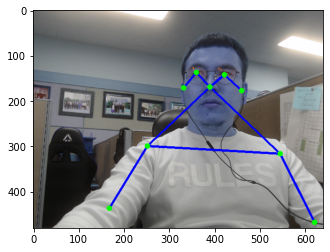

In [ ]:
plt.imshow(frame)

In [ ]:
results

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
 array([[[ 3.53524029e-01,  6.10128224e-01,  6.74006522e-01,
           2.96414346e-01,  6.60700560e-01,  5.85439742e-01,
           2.86579788e-01,  5.63778818e-01,  7.80308366e-01,
           3.69344056e-01,  7.19878137e-01,  6.39788687e-01,
           3.57315034e-01,  5.19974411e-01,  7.32787132e-01,
           6.60097837e-01,  8.52972329e-01,  8.49535525e-01,
           6.24592006e-01,  3.94900829e-01,  7.92814136e-01,
           9.73935962e-01,  9.70446050e-01,  5.74788153e-01,
           9.09843206e-01,  2.63813913e-01,  4.14157063e-01,
           9.50219989e-01,  8.91934752e-01,  1.09733485e-01,
           9.50056732e-01,  2.38500148e-01,  4.02665734e-02,
           9.83025432e-01,  7.31797397e-01,  1.00663174e-02,
           9.89771247e-01,  4.74104524e-01,  1.75595172e-02,
           8.68314028e-01,  8.68006647e-01,  1.14998361e-02,
           8.73313844e-01,  2.75161892e-01,  1.55406259e-02,
           7.6036024

In [ ]:
# mp4 videos

cap = cv2.VideoCapture('tennis.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 192,256)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

In [ ]:
results

{'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=
 array([[[0.6489475 , 0.57949835, 0.38579544, 0.64304423, 0.579845  ,
          0.31953192, 0.6439516 , 0.5786083 , 0.33279064, 0.6435334 ,
          0.57549196, 0.29287595, 0.6450918 , 0.5769741 , 0.34499803,
          0.6670573 , 0.57503605, 0.47190475, 0.6666353 , 0.57147276,
          0.5410237 , 0.69305086, 0.57964885, 0.32746068, 0.6915703 ,
          0.5739928 , 0.36054096, 0.71630836, 0.57871604, 0.29342988,
          0.72187734, 0.5744243 , 0.38961184, 0.72211826, 0.57113576,
          0.5376315 , 0.72108746, 0.5700324 , 0.50834376, 0.75915015,
          0.5739495 , 0.4155323 , 0.76035917, 0.5742512 , 0.42680758,
          0.79051495, 0.5711415 , 0.46767828, 0.79473746, 0.57291126,
          0.44873607, 0.6257253 , 0.5509719 , 0.82128954, 0.5960799 ,
          0.21833566],
         [0.22958675, 0.33843553, 0.19568886, 0.22797328, 0.34109738,
          0.27752993, 0.22681451, 0.33742544, 0.2397514 , 0.23312652,
  

In [ ]:
frame.shape

(1080, 1920, 3)

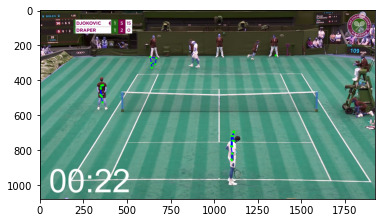

In [ ]:
plt.imshow(frame)

In [ ]:
keypoints_with_scores

array([[[0.6489475 , 0.57949835, 0.38579544],
        [0.64304423, 0.579845  , 0.31953192],
        [0.6439516 , 0.5786083 , 0.33279064],
        [0.6435334 , 0.57549196, 0.29287595],
        [0.6450918 , 0.5769741 , 0.34499803],
        [0.6670573 , 0.57503605, 0.47190475],
        [0.6666353 , 0.57147276, 0.5410237 ],
        [0.69305086, 0.57964885, 0.32746068],
        [0.6915703 , 0.5739928 , 0.36054096],
        [0.71630836, 0.57871604, 0.29342988],
        [0.72187734, 0.5744243 , 0.38961184],
        [0.72211826, 0.57113576, 0.5376315 ],
        [0.72108746, 0.5700324 , 0.50834376],
        [0.75915015, 0.5739495 , 0.4155323 ],
        [0.76035917, 0.5742512 , 0.42680758],
        [0.79051495, 0.5711415 , 0.46767828],
        [0.79473746, 0.57291126, 0.44873607]],

       [[0.22958675, 0.33843553, 0.19568886],
        [0.22797328, 0.34109738, 0.27752993],
        [0.22681451, 0.33742544, 0.2397514 ],
        [0.23312652, 0.34449032, 0.23991771],
        [0.23153171, 0.33623186,

In [ ]:
# mp4 videos

cap = cv2.VideoCapture('tennis.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    #Frame Scaling
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.3)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

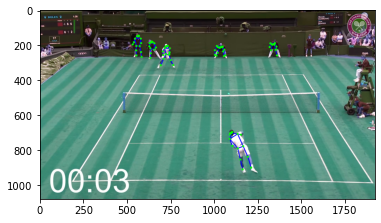

In [ ]:
plt.imshow(frame)

In [ ]:
# mp4 videos

cap = cv2.VideoCapture('baseball1.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    #Frame Scaling
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.4)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

In [ ]:
frame.shape

(480, 854, 3)

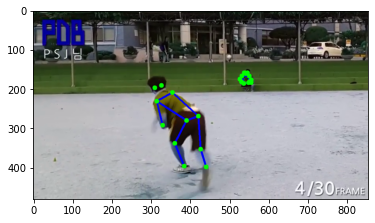

In [ ]:
plt.imshow(frame)

In [ ]:
# mp4 videos

cap = cv2.VideoCapture('baseball2.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    #Frame Scaling
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.4)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

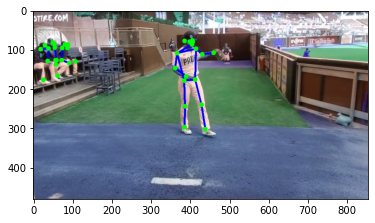

In [ ]:
plt.imshow(frame)

In [ ]:
# mp4 videos

cap = cv2.VideoCapture('baseball2.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    #Frame Scaling
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 352,640)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
   
    # Render keypoints
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.4)
        
    cv2.imshow('Movenet Multipose', frame)
        
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break



# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('outpy.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

while(True):
  ret, frame = cap.read()
 
  if ret == True: 
     
    # Write the frame into the file 'output.avi'
    out.write(frame)
    
cap.release()
cv2.destroyAllWindows()

In [ ]:
out